In [12]:
'''To Do List
change to .json to get the Luminosity distance --DONE,
use polynomial fit --DONE,
show some graphs of fitting --DONE,
show differnce in fitting graph,
type IIP supernova,
Philips relation'''

'To Do List\nchange to .json to get the Luminosity distance --DONE,\nuse polynomial fit --DONE,\nshow some graphs of fitting --DONE,\nshow differnce in fitting graph,\ntype IIP supernova,\nPhilips relation'

In [13]:
import os
import glob
import numpy as np
import pandas as pd
import json
import math as mth
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit, minimize
from lmfit import Model

In [14]:
# Import the .json file

os.chdir(r"C:\Users\ricky\JupyterNotebooks\Intern21\import_photometry_data\typeIa_photometry")
filename = glob.glob('*.json')
print(len(filename))

# Create a list for all .json, the 1st SN saved as json_data[0], the 2nd SN saved as json_data[1], etc.
json_data = []
for i in filename:
    with open(i, encoding="utf-8") as f:
        json_data.append(json.load(f))

60


In [15]:
'''import mosfit

# Create an instance of the `Fetcher` class.
my_fetcher = mosfit.fetcher.Fetcher()

# Fetch some data from the Open Supernova Catalog.
fetched = my_fetcher.fetch('SN1994D')[0]

# Instantiatiate the `Model` class (selecting 'slsn' as the model).
my_model = mosfit.model.Model(model='default')

# Load the fetched data into the model.
my_model.load_data(my_fetcher.load_data(fetched), event_name=fetched['name'])

# Generate a random input vector of free parameters.
x = np.random.rand(my_model.get_num_free_parameters())

# Produce model output.
outputs = my_model.run(x)
print('Keys in output: `{}`'.format(', '.join(list(outputs.keys()))))'''

"import mosfit\n\n# Create an instance of the `Fetcher` class.\nmy_fetcher = mosfit.fetcher.Fetcher()\n\n# Fetch some data from the Open Supernova Catalog.\nfetched = my_fetcher.fetch('SN1994D')[0]\n\n# Instantiatiate the `Model` class (selecting 'slsn' as the model).\nmy_model = mosfit.model.Model(model='default')\n\n# Load the fetched data into the model.\nmy_model.load_data(my_fetcher.load_data(fetched), event_name=fetched['name'])\n\n# Generate a random input vector of free parameters.\nx = np.random.rand(my_model.get_num_free_parameters())\n\n# Produce model output.\noutputs = my_model.run(x)\nprint('Keys in output: `{}`'.format(', '.join(list(outputs.keys()))))"

In [16]:
# To obtain absolute magnitude and time in a particular band

Band = [] # Contain EM band chosen for analysis
Magnitude_Abs = [] # Contain absolute magnitude
Time = [] # Contain time (day)

for i in range(len(filename)): # Loop through all SN
    Band.append([]) # Create 2D list
    Magnitude_Abs.append([])
    Time.append([])
    
    SN_name = filename[i].replace('.json', '')
    N = len(json_data[i][SN_name]['photometry']) # The no. of data point of photometry in each SN
    
    for j in range(N): # Loop through all photemetry datapoint in one SN
        # Avoid any data point without band data
        try:
            Band[i].append(json_data[i][SN_name]['photometry'][j]['band'])
        except:
            Band[i].append(0)
        
        # Fill the Magnitude_Abs and Time list if the data point is in B band
        if Band[i][j] == 'B':
            Magnitude_App = float(json_data[i][SN_name]['photometry'][j]['magnitude']) # Obtain the apparent magnitude from photometry
            LumDist = float(json_data[i][SN_name]['lumdist'][0]['value']) # Obtain the luminosity distance
            z = float(json_data[i][SN_name]['redshift'][0]['value']) #Obtain the redshift, z
            Magnitude_Abs[i].append(Magnitude_App - 5*np.log10(LumDist*1e5) + 2.5*np.log10(1+z)) # Calculate the absolute magnitude and fill the Magnitude_Abs list
            Time[i].append(float(json_data[i][SN_name]['photometry'][j]['time'])) # Fill the Time list

'''print(Band[13])
print(Magnitude_Abs[13])
print(len(Time[13]))'''

'print(Band[13])\nprint(Magnitude_Abs[13])\nprint(len(Time[13]))'

id: 0 , SN: SN1937C.json , R^2 score: 0.9652315795975914 , Time of maximum brightness: 28774.2


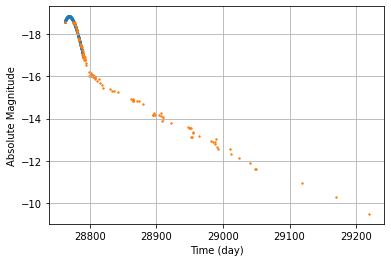

id: 1 , SN: SN1972E.json , R^2 score: 0.9726543402425235 , Time of maximum brightness: 41454.83


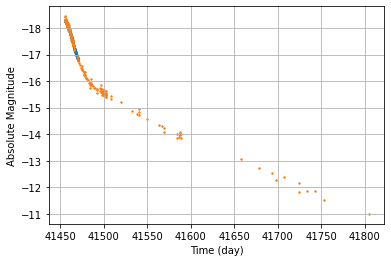

id: 2 , SN: SN1980N.json , R^2 score: 0.9730784054665217 , Time of maximum brightness: 44586.2


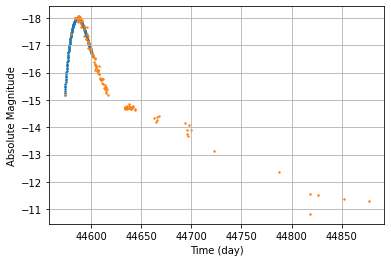

id: 3 , SN: SN1981B.json , R^2 score: 0.9226181462830446 , Time of maximum brightness: 44671.95


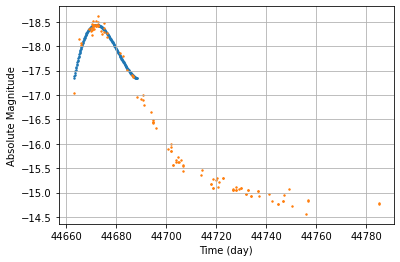

id: 4 , SN: SN1989B.json , R^2 score: 0.9266221550498487 , Time of maximum brightness: 47564.96


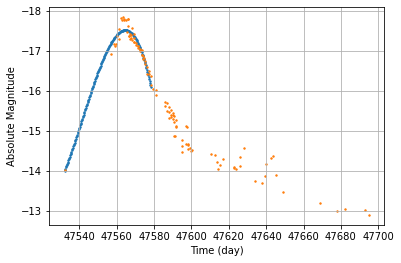

id: 5 , SN: SN1990N.json , R^2 score: 0.989229942153429 , Time of maximum brightness: 48083.99


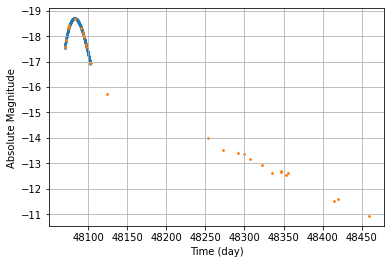

id: 6 , SN: SN1994ae.json , R^2 score: 0.9468129107396942 , Time of maximum brightness: 49685.5


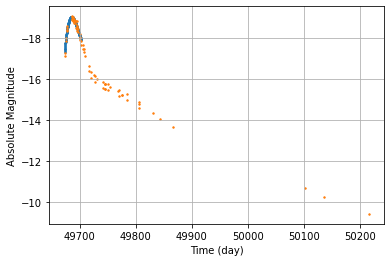

id: 7 , SN: SN1994D.json , R^2 score: 0.9827567380205636 , Time of maximum brightness: 49432.0


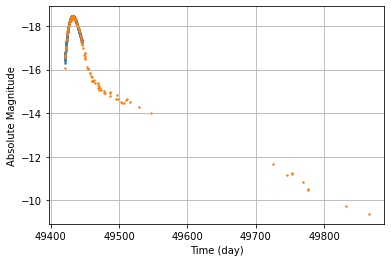

id: 8 , SN: SN1998bu.json , R^2 score: 0.9892001872233419 , Time of maximum brightness: 50952.16


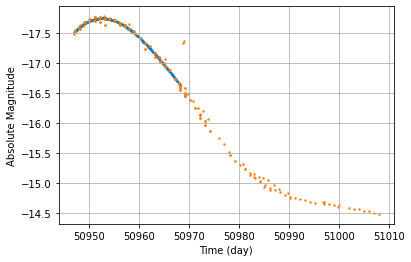

id: 9 , SN: SN1999ee.json , R^2 score: 0.9946819717508676 , Time of maximum brightness: 51469.09


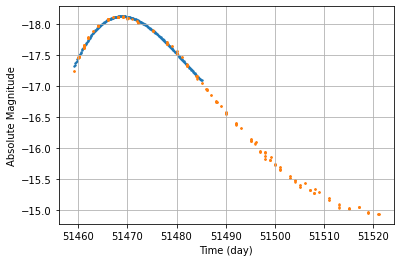

id: 10 , SN: SN2000cx.json , R^2 score: 0.9915789426704873 , Time of maximum brightness: 51752.38


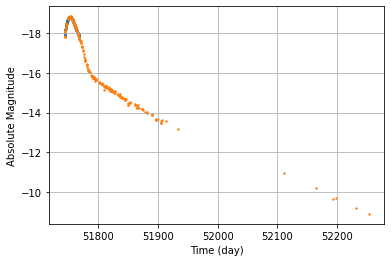

id: 11 , SN: SN2000E.json , R^2 score: 0.9618124596343111 , Time of maximum brightness: 51578.75


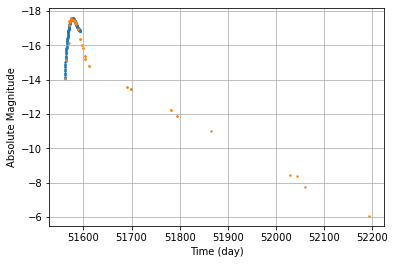

id: 12 , SN: SN2001el.json , R^2 score: 0.997837538195866 , Time of maximum brightness: 52183.34


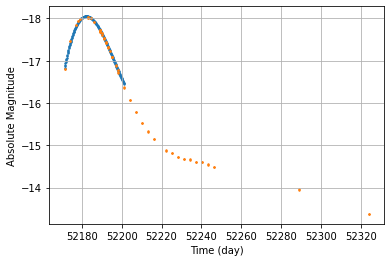

id: 13 , SN: SN2002er.json , R^2 score: 0.9905742716585295 , Time of maximum brightness: 52523.4


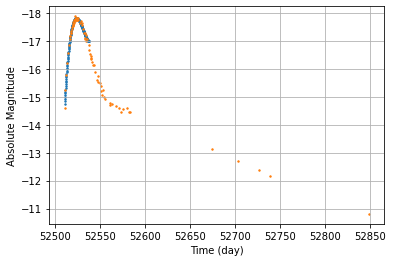

id: 14 , SN: SN2002fk.json , R^2 score: 0.9930891502705451 , Time of maximum brightness: 52548.49


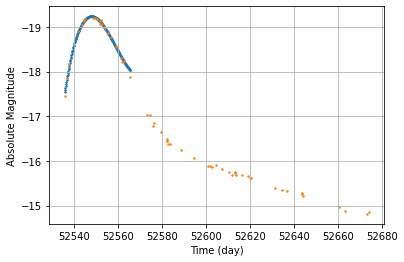

id: 15 , SN: SN2003cg.json , R^2 score: 0.8742448438186581 , Time of maximum brightness: 52730.26


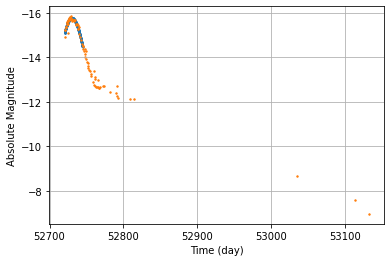

id: 16 , SN: SN2003du.json , R^2 score: 0.9716154261776687 , Time of maximum brightness: 52765.33


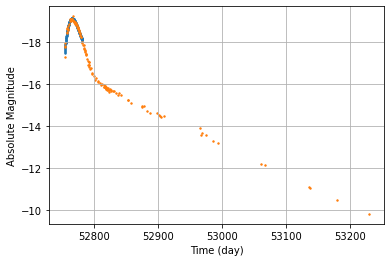

id: 17 , SN: SN2004eo.json , R^2 score: 0.9946589089813148 , Time of maximum brightness: 53277.98707


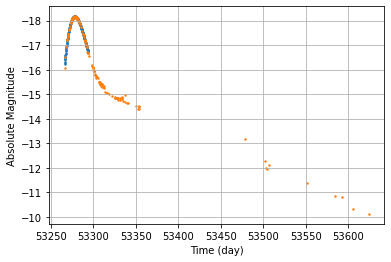

id: 18 , SN: SN2004gs.json , R^2 score: 0.992343730429703 , Time of maximum brightness: 53355.39


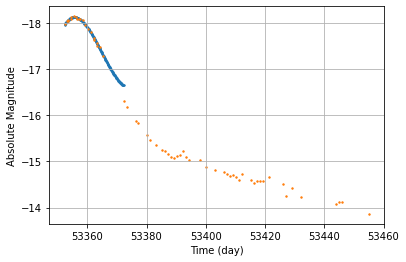

id: 19 , SN: SN2005ag.json , R^2 score: 0.9914661309041377 , Time of maximum brightness: 53413.31425


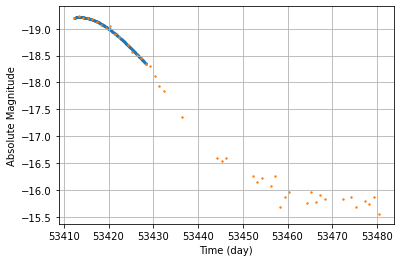

id: 20 , SN: SN2005am.json , R^2 score: 0.9934606840834038 , Time of maximum brightness: 53436.75416


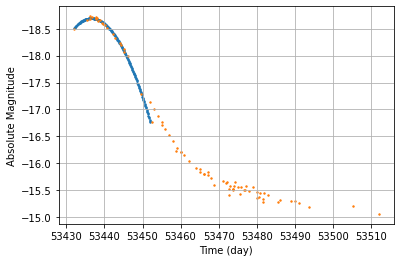

id: 21 , SN: SN2005cf.json , R^2 score: 0.9865501416412255 , Time of maximum brightness: 53533.0


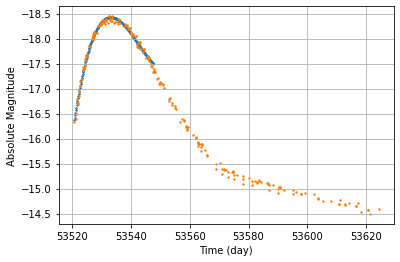

id: 22 , SN: SN2005el.json , R^2 score: 0.9953850581219051 , Time of maximum brightness: 53646.46


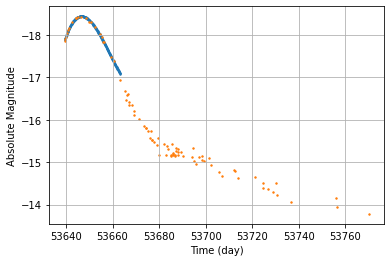

id: 23 , SN: SN2005hc.json , R^2 score: 0.9800148538225054 , Time of maximum brightness: 53666.813


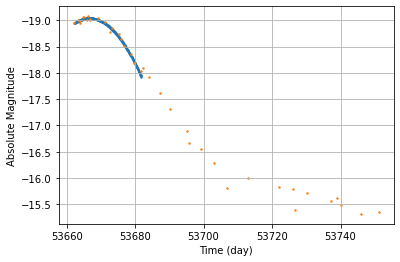

id: 24 , SN: SN2005ki.json , R^2 score: 0.9929376253287111 , Time of maximum brightness: 53704.97659


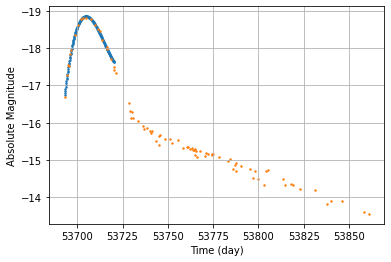

id: 25 , SN: SN2005na.json , R^2 score: 0.9895970855994772 , Time of maximum brightness: 53740.25501


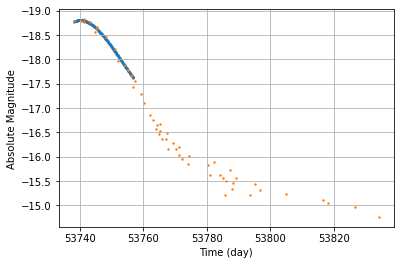

id: 26 , SN: SN2006ax.json , R^2 score: 0.9800134935784007 , Time of maximum brightness: 53826.78309


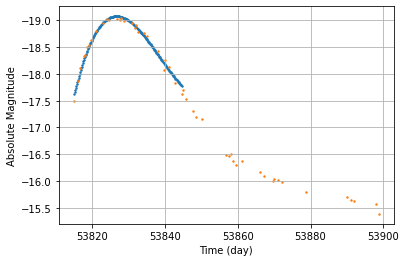

id: 27 , SN: SN2006D.json , R^2 score: 0.9933319306885119 , Time of maximum brightness: 53756.93497


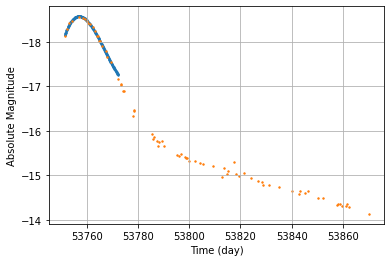

id: 28 , SN: SN2006le.json , R^2 score: 0.9752539927943993 , Time of maximum brightness: 54045.88502


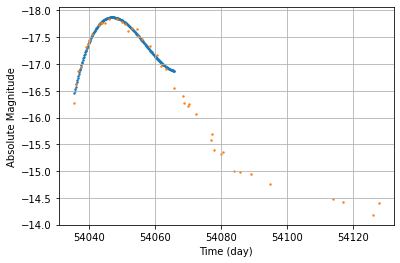

id: 29 , SN: SN2007af.json , R^2 score: 0.9926013034712357 , Time of maximum brightness: 54173.91378


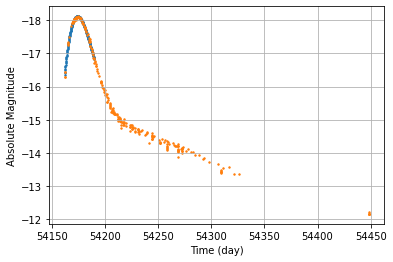

id: 30 , SN: SN2007if.json , R^2 score: 0.9935326118918166 , Time of maximum brightness: 54356.35412


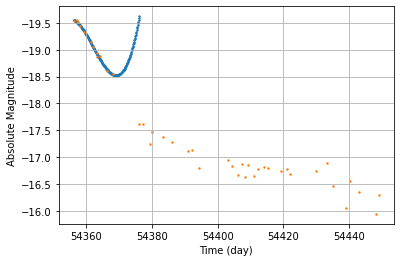

id: 31 , SN: SN2007jg.json , R^2 score: 0.9957999070405638 , Time of maximum brightness: 54366.53


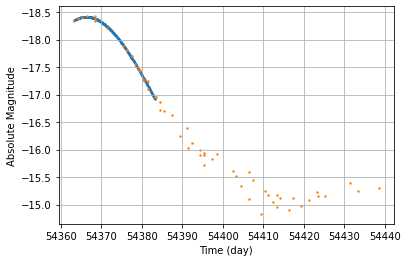

id: 32 , SN: SN2007on.json , R^2 score: 0.9982017602847097 , Time of maximum brightness: 54418.8957


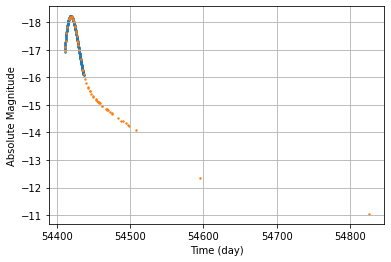

id: 33 , SN: SN2007sr.json , R^2 score: 0.9867126098494431 , Time of maximum brightness: 54453.02861


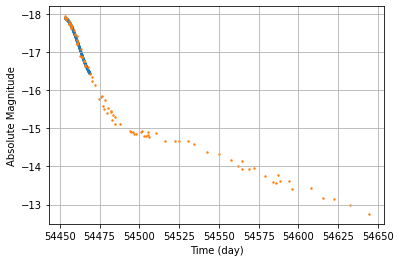

id: 34 , SN: SN2008C.json , R^2 score: 0.9881840262533004 , Time of maximum brightness: 54469.30411


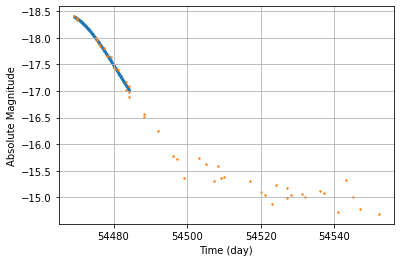

id: 35 , SN: SN2008hs.json , R^2 score: 0.9919288190380472 , Time of maximum brightness: 54812.6772


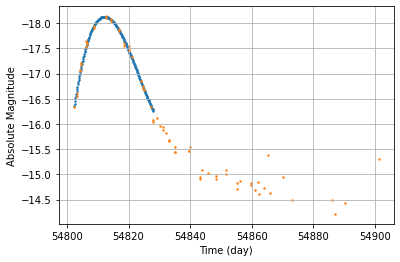

id: 36 , SN: SN2008hv.json , R^2 score: 0.9880239070739216 , Time of maximum brightness: 54817.26045


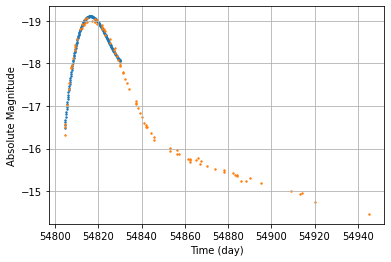

id: 37 , SN: SN2009an.json , R^2 score: 0.9252314941914294 , Time of maximum brightness: 54898.23309


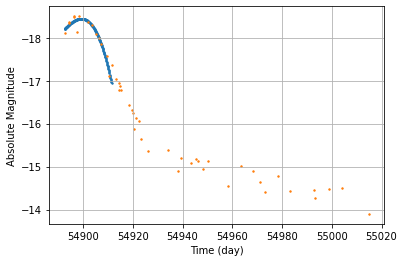

id: 38 , SN: SN2011by.json , R^2 score: 0.9954941907011579 , Time of maximum brightness: 55691.1022


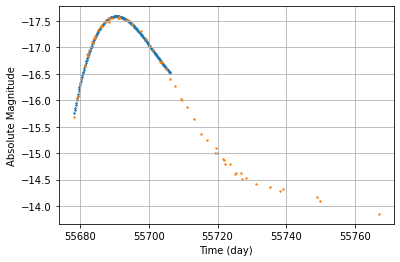

id: 39 , SN: SN2011fe.json , R^2 score: 0.9895991080071012 , Time of maximum brightness: 55813.7798


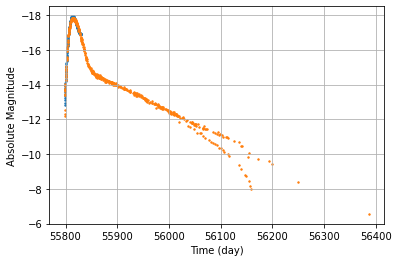

id: 40 , SN: SN2012cg.json , R^2 score: 0.9881409059472092 , Time of maximum brightness: 56080.8


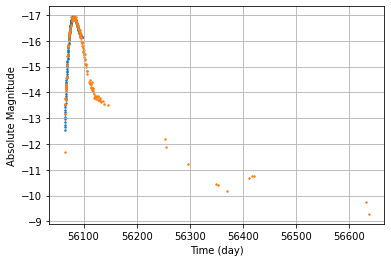

id: 41 , SN: SN2012fr.json , R^2 score: 0.9539603678252003 , Time of maximum brightness: 56242.193


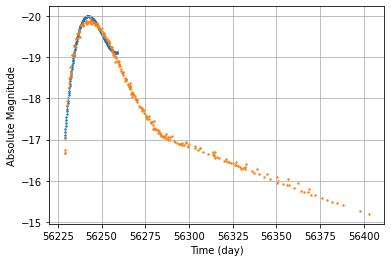

id: 42 , SN: SN2012hr.json , R^2 score: 0.9997201048075057 , Time of maximum brightness: 56288.1155


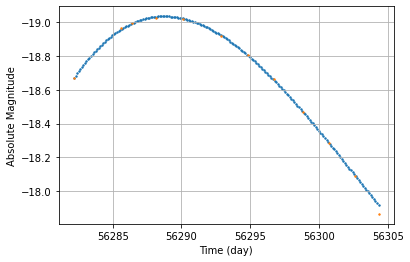

id: 43 , SN: SN2012ht.json , R^2 score: 0.9956832017893471 , Time of maximum brightness: 56295.307


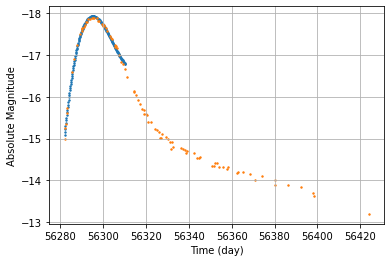

id: 44 , SN: SN2013aa.json , R^2 score: 0.9878315213520721 , Time of maximum brightness: 56351.814


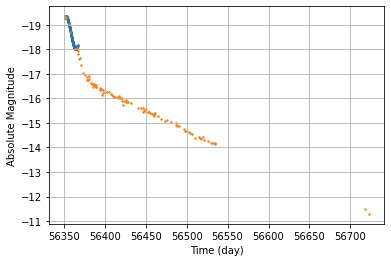

id: 45 , SN: SN2013gh.json , R^2 score: 0.9305312176394688 , Time of maximum brightness: 56527.8652


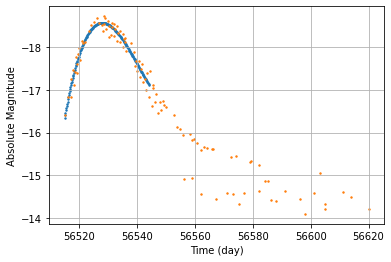

id: 46 , SN: SN2013gy.json , R^2 score: 0.99360116435659 , Time of maximum brightness: 56648.3


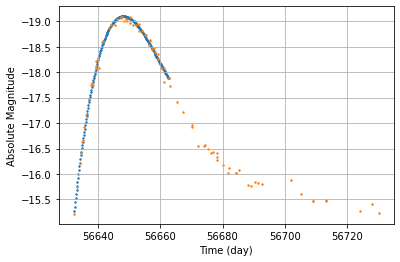

id: 47 , SN: SN2015F.json , R^2 score: 0.980203500760732 , Time of maximum brightness: 57106.314


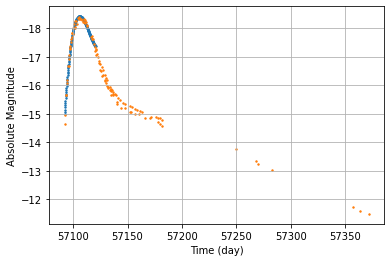

id: 48 , SN: SN2016coj.json , R^2 score: 0.9913124901140721 , Time of maximum brightness: 57547.21


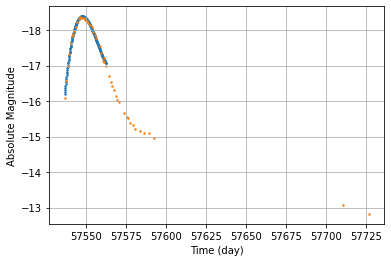

id: 49 , SN: SN2016dxj.json , R^2 score: 0.10412318062871861 , Time of maximum brightness: 57511.9571


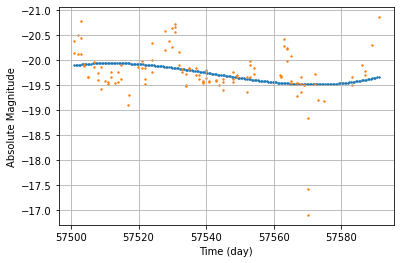

id: 50 , SN: SN2016dxv.json , R^2 score: 0.9894914662515851 , Time of maximum brightness: 57509.0749


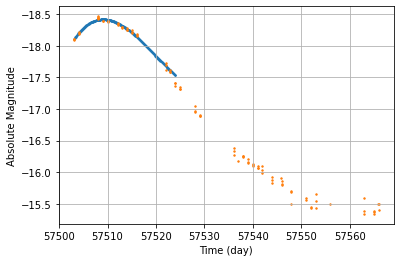

id: 51 , SN: SN2016fbo.json , R^2 score: 0.47234259281596336 , Time of maximum brightness: 57619.1026


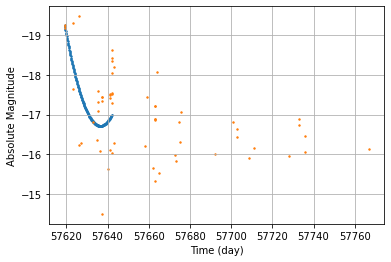

id: 52 , SN: SN2016hvl.json , R^2 score: 0.9927275384424118 , Time of maximum brightness: 57709.0687


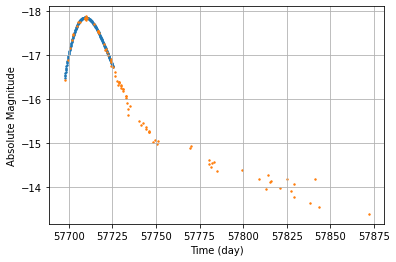

id: 53 , SN: SN2017drh.json , R^2 score: 0.9742893918991155 , Time of maximum brightness: 57891.36


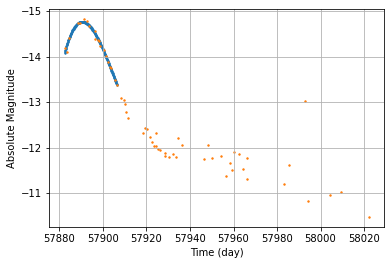

id: 54 , SN: SN2017erp.json , R^2 score: 0.9930569360895841 , Time of maximum brightness: 57933.402


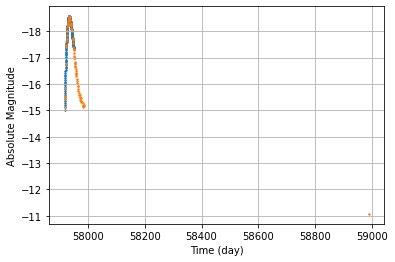

id: 55 , SN: SN2017fgc.json , R^2 score: 0.9289811405192382 , Time of maximum brightness: 57959.49


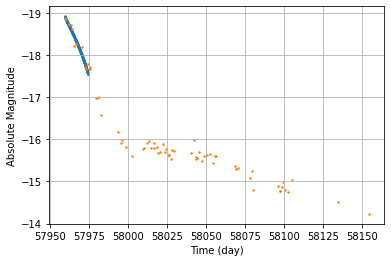

id: 56 , SN: SN2017hbi.json , R^2 score: 0.9817661266472363 , Time of maximum brightness: 58045.47


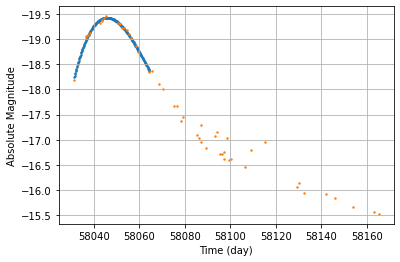

id: 58 , SN: SN2018gv.json , R^2 score: 0.9691658279723835 , Time of maximum brightness: 58147.31


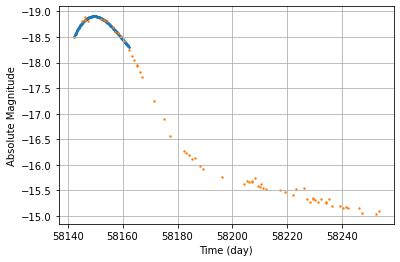

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


In [17]:
# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 15 # Num of days after the maximum used for peak fitting from the peak

for i in range(len(filename)): # Loop through all SN
    if len(Time[i]) != 0: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        
        # Save the time of maximum magnitude
        Time_max.append(Time[i][np.argmin(P(t))])
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, P(t)), ', Time of maximum brightness:', Time_max[i])
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], 200)
        Y = P(X)
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        #plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
    
        if r2_score(m, P(t)) > 0.8:
            Succ_graph.append(1)
        else:
            Succ_graph.append(0)
        
    else:
        Time_max.append(0)
        Succ_graph.append(0)


print(Succ_graph)

In [18]:
'''lamb = 0.5
sigma = 0.14
offset = 0.5
def expconv(xrange):    
    piece1 = 1/(2*lamb)
    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) -(xrange-offset)/lamb)
    piece3 = mth.erf(sigma/((np.sqrt(2)*lamb))-(xrange-offset)/(np.sqrt(2)*sigma))
    return np.log10(piece1*piece2*(1.0-piece3))

vec_expconv = np.vectorize(expconv)
xrange = np.arange(0.0,4, 0.01)
plt.plot(xrange, vec_expconv(xrange))
plt.show()         
'''

'lamb = 0.5\nsigma = 0.14\noffset = 0.5\ndef expconv(xrange):    \n    piece1 = 1/(2*lamb)\n    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) -(xrange-offset)/lamb)\n    piece3 = mth.erf(sigma/((np.sqrt(2)*lamb))-(xrange-offset)/(np.sqrt(2)*sigma))\n    return np.log10(piece1*piece2*(1.0-piece3))\n\nvec_expconv = np.vectorize(expconv)\nxrange = np.arange(0.0,4, 0.01)\nplt.plot(xrange, vec_expconv(xrange))\nplt.show()         \n'

piece 2 is [7.480090553223867, 1.2905933073487053, 1.1187868157060863, 0.9698515650674857, 0.8407428877951286, 0.7288214288017437, 0.6408896696011166, 0.6317991894925821, 0.5555730907554038, 0.5476927544511966, 0.4747827446870452, 0.4747827446870452, 0.46804835138814344, 0.4115786685519325, 0.3567884517762753, 0.3567884517762753, 0.313742192449438, 0.3092920237309365, 0.27197617285358605, 0.27197617285358605, 0.23577013350540907, 0.23577013350540907, 0.20438391815698895, 0.17717590171464362, 0.17717590171464362, 0.17466281079331378, 0.15358987356473483, 0.15358987356473483, 0.1514113305849712]
piece 3 is [0.0015020575477783626, 0.475050524053953, 0.607052248071005, 0.7533040472859123, 0.9090113066460508, 1.0683064544332284, 1.2095407396234537, 1.2249030378040153, 1.3585799745890093, 1.3728302464606013, 1.5071067035603656, 1.5071067035603656, 1.5196341648462695, 1.6242284917488696, 1.7223945816364363, 1.7223945816364363, 1.7943846081152277, 1.801457206313338, 1.8572738593665366, 1.85727

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


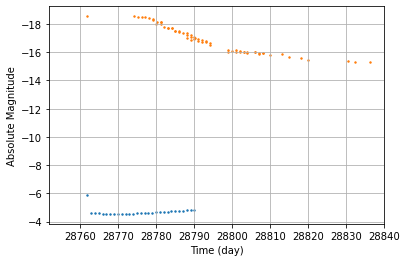

[1.20287131e-06 2.26165092e-05 2.46277586e-05 2.62706844e-05
 2.74721374e-05 2.81871347e-05 2.84026538e-05 2.84018671e-05
 2.81807230e-05 2.81331565e-05 2.74246739e-05 2.74246739e-05
 2.73319743e-05 2.63407078e-05 2.49585639e-05 2.49585639e-05
 2.35278860e-05 2.33607386e-05 2.18050688e-05 2.18050688e-05
 2.00135610e-05 2.00135610e-05 1.82166794e-05 1.64648756e-05
 1.64648756e-05 1.62937190e-05 1.47953734e-05 1.47953734e-05
 1.46340069e-05]
piece 2 is [1.2905933073487053, 1.2905933073487053, 1.2668463360373141, 1.2650378476418838, 1.2650378476418838, 1.2632319409567865, 1.2614286122978093, 1.2596278579820648, 1.2596278579820648, 1.2578296743358564, 1.2578296743358564, 1.2560340576907263, 1.2542410043795376, 1.2524505107443045, 1.2524505107443045, 1.2524505107443045, 1.2506625731309573, 1.2506625731309573, 1.2506625731309573, 1.2488771878919418, 1.2488771878919418, 1.2488771878919418, 1.2470943513810158, 1.1013432952183382, 1.0551400103852362, 1.053633743673912, 0.9852124663584635, 0.985

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


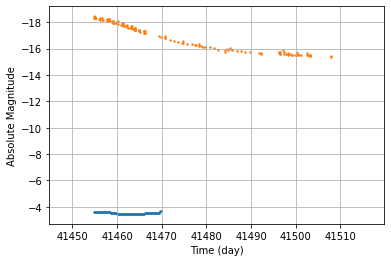

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[0.00024641 0.00024641 0.00025011 0.00025039 0.00025039 0.00025068
 0.00025096 0.00025124 0.00025124 0.00025152 0.00025152 0.00025181
 0.00025209 0.00025237 0.00025237 0.00025237 0.00025265 0.00025265
 0.00025265 0.00025293 0.00025293 0.00025293 0.00025321 0.00027666
 0.0002842  0.00028445 0.00029557 0.00029557 0.0002976  0.00031584
 0.00031584 0.00031691 0.00032282 0.00032282 0.00032392 0.00032438
 0.00032454 0.00032454 0.00032469 0.00033298 0.00033368 0.00033368
 0.00033586 0.00033586 0.00033627 0.00033637 0.00033687 0.00034122
 0.00034122 0.00034191 0.00034372 0.00034372 0.00034494 0.00034473
 0.00034438 0.00034438 0.0003441  0.0003441  0.00034407 0.00034279
 0.00034007 0.00034007 0.00033877 0.00033466 0.00033174 0.00033174
 0.00033174 0.00032998 0.00032998 0.00032604 0.00031906 0.00031906
 0.00031891 0.00031891 0.00031891 0.00031876 0.00031876 0.0003186
 0.0003186  0.00030306 0.00030306 0.00030288 0.00030288 0.00029995
 0.00028389 0.00028389 0.00028369 0.00028369 0.00028004 0.00027

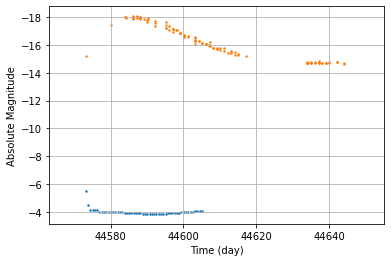

[2.92032061e-06 3.16805102e-05 7.34038482e-05 7.34038482e-05
 7.35248373e-05 7.35248373e-05 9.81694165e-05 9.81694165e-05
 9.85200493e-05 9.85200493e-05 9.86367766e-05 9.86367766e-05
 9.87534277e-05 9.88700022e-05 1.09302243e-04 1.09409230e-04
 1.09835906e-04 1.09942254e-04 1.19293712e-04 1.19293712e-04
 1.19293712e-04 1.19568902e-04 1.19660282e-04 1.19933372e-04
 1.27990595e-04 1.33575321e-04 1.33575321e-04 1.33877120e-04
 1.33926598e-04 1.38983112e-04 1.38984397e-04 1.38984397e-04
 1.30148157e-04 1.30090549e-04 1.29916812e-04 1.29858597e-04
 1.23269204e-04 1.23269204e-04 1.16831637e-04 1.16273400e-04
 1.16193351e-04 1.16033033e-04 1.07877571e-04 1.07706253e-04
 9.98845110e-05 9.91827151e-05 9.88316619e-05 9.87438855e-05
 9.00738382e-05 8.99868824e-05 8.91184742e-05 8.90317530e-05]
piece 2 is [5.174141695159207, 4.029625603912397, 3.523263726652396, 3.5081963352968453, 2.1801370790053327, 2.015397258386377, 2.015397258386377, 1.898029659031693, 1.8899126522156386, 1.8899126522156386, 

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


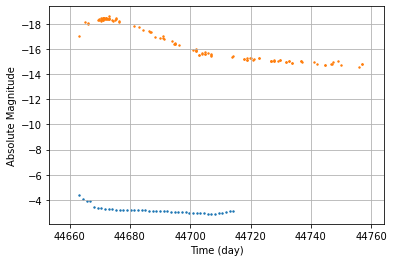

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[3.82315292e-05 8.65534645e-05 1.28163625e-04 1.29710763e-04
 4.02397651e-04 4.67332297e-04 4.67332297e-04 5.20253507e-04
 5.24135125e-04 5.24135125e-04 5.98804344e-04 6.07031495e-04
 6.08406525e-04 6.08406525e-04 6.11159816e-04 6.11159816e-04
 6.20829619e-04 6.59987241e-04 6.59987241e-04 7.31432293e-04
 7.47338450e-04 7.53134290e-04 7.53134290e-04 7.60386724e-04
 7.92373073e-04 8.79632160e-04 8.95528167e-04 8.99853383e-04
 8.99853383e-04 9.01294074e-04 1.06503968e-03 1.08069168e-03
 1.18709589e-03 1.19592939e-03 1.19592939e-03 1.29047899e-03
 1.30715611e-03 1.29690676e-03 1.17791805e-03 1.04545825e-03
 8.56972414e-04 8.12389106e-04 8.11492696e-04]
piece 2 is [109.7230192730368, 3.0893452760132716, 2.4545886315272774, 2.338214853488209, 2.1278286376490385, 2.0327463390129696, 1.7421187429229315, 1.6618961070398255, 1.4887832620033694, 1.322319980793078, 1.2905933073487053, 1.139758418701947, 1.1348841919969017, 0.9894438663088129, 0.9411881195248892, 0.8651105651949125, 0.8638755753043

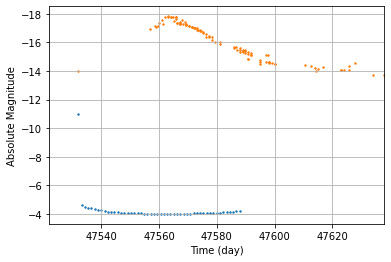

[1.02324166e-11 2.26014990e-05 3.33732152e-05 3.59479332e-05
 4.12018406e-05 4.38561928e-05 5.31950554e-05 5.61246104e-05
 6.29922383e-05 7.02826221e-05 7.17416517e-05 7.89139992e-05
 7.91506429e-05 8.62366152e-05 8.85496503e-05 9.20664165e-05
 9.21216236e-05 9.26116260e-05 9.41539930e-05 9.43971674e-05
 9.81290506e-05 9.81290506e-05 9.83849630e-05 9.84161627e-05
 1.00103043e-04 1.00598817e-04 1.01118408e-04 1.01120807e-04
 1.01120807e-04 1.01087113e-04 1.00015746e-04 9.98171400e-05
 9.74350918e-05 9.74018264e-05 9.71309840e-05 9.35006005e-05
 9.34555245e-05 9.29991081e-05 8.83649725e-05 8.83107620e-05
 8.78744637e-05 8.26881806e-05 8.26881806e-05 8.22668012e-05
 7.65022373e-05 7.59322455e-05 7.00539659e-05 6.95414815e-05
 6.38148877e-05 6.31860258e-05]
piece 2 is [9.522652837511897, 9.522652837511897, 9.522652837511897, 8.254977291832422, 7.18679200743801, 7.18679200743801, 7.176532491681363, 7.176532491681363, 4.64179915876362, 4.64179915876362, 4.64179915876362, 4.006664836560218, 4

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


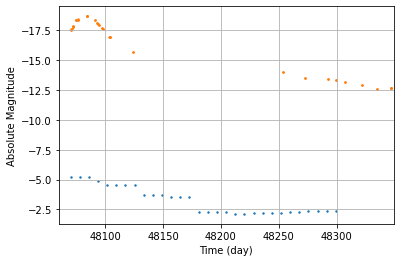

[6.32221794e-06 6.32221794e-06 6.32221794e-06 1.35112207e-05
 2.70246112e-05 2.70246112e-05 2.72123963e-05 2.72123963e-05
 1.82348137e-04 1.82348137e-04 1.82348137e-04 3.15692897e-04
 3.15692897e-04 3.15692897e-04 4.76623443e-03 4.76623443e-03
 4.76623443e-03 4.76623443e-03 7.54845214e-03 7.54845214e-03
 6.78882668e-03 6.78882668e-03 6.27487327e-03 6.27487327e-03
 5.73687088e-03 5.73687088e-03 4.63780664e-03 4.63780664e-03
 4.13117312e-03 4.13117312e-03]
piece 2 is [8.302283622865094, 8.302283622865094, 6.247896817768186, 6.247896817768186, 4.69515258803013, 4.69515258803013, 4.046932487617741, 4.046932487617741, 1.2905933073487053, 1.2905933073487053, 1.1203862247490146, 1.1203862247490146, 0.9643253603178334, 0.9643253603178334, 0.9588306438288956, 0.8335673165658748, 0.8335673165658748, 0.7257045920991725, 0.7257045920991725, 0.5865664091275227, 0.5063069136283321, 0.40981853438265153, 0.40981853438265153, 0.3552626303643306, 0.3552626303643306, 0.330299618353253, 0.310620405474517,

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


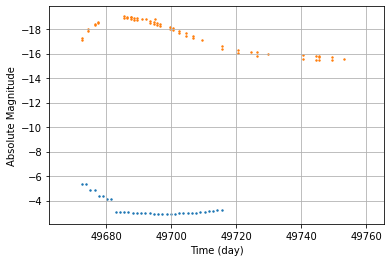

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[4.21121474e-06 4.21121474e-06 1.43361560e-05 1.43361560e-05
 4.19005374e-05 4.19005374e-05 6.87790408e-05 6.87790408e-05
 7.98313491e-04 7.98313491e-04 9.23894516e-04 9.23894516e-04
 1.04237686e-03 1.04237686e-03 1.04647031e-03 1.13478266e-03
 1.13478266e-03 1.19635786e-03 1.19635786e-03 1.23530853e-03
 1.22361204e-03 1.16013360e-03 1.16013360e-03 1.09386357e-03
 1.09386357e-03 1.05508366e-03 1.02053283e-03 1.01971300e-03
 9.36947959e-04 9.36947959e-04 6.83536304e-04 6.83536304e-04
 6.09495058e-04 6.09495058e-04]
piece 2 is [6.037313834711205, 5.416163671237099, 5.416163671237099, 5.3853024235188744, 4.749119268386189, 4.68845001588015, 4.68175701199714, 4.668399654419606, 4.582500903791879, 4.081769568856143, 3.989530159220878, 3.938564538243227, 3.9329420345034705, 3.58418320848138, 3.5081963352968453, 3.4142545549428327, 3.4142545549428327, 3.111491025789328, 3.041177871053413, 2.9512974816876465, 2.67044439318739, 2.636329885625512, 2.5620720522812137, 2.5620720522812137, 2.301758

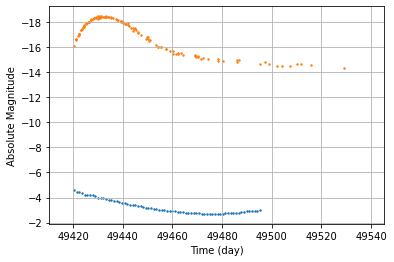

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[2.61666935e-05 3.98180102e-05 3.98180102e-05 4.06819687e-05
 6.42085350e-05 6.71614357e-05 6.74964888e-05 6.81708194e-05
 7.26935605e-05 1.06877075e-04 1.14985192e-04 1.19761319e-04
 1.20301775e-04 1.59877955e-04 1.70330112e-04 1.84328060e-04
 1.84328060e-04 2.39008219e-04 2.54164851e-04 2.75121609e-04
 3.54010757e-04 3.65187286e-04 3.90880823e-04 3.90880823e-04
 4.97784047e-04 5.05499206e-04 5.32271232e-04 6.60009393e-04
 6.74516174e-04 7.11476537e-04 8.68226422e-04 8.82533348e-04
 1.03591136e-03 1.06814146e-03 1.07892074e-03 1.12000882e-03
 1.25238196e-03 1.25238196e-03 1.29557209e-03 1.32778009e-03
 1.46429620e-03 1.56029541e-03 1.65231926e-03 1.69300348e-03
 1.70161367e-03 1.72691751e-03 1.84719182e-03 1.85382028e-03
 1.95774473e-03 1.96450597e-03 2.01912131e-03 2.03045102e-03
 2.02529256e-03 1.99523413e-03 1.92039373e-03 1.90916588e-03
 1.89948422e-03 1.81494839e-03 1.80904747e-03 1.71902368e-03
 1.68861621e-03 1.58854811e-03 1.57874719e-03 1.53083399e-03
 1.38904800e-03 1.296846

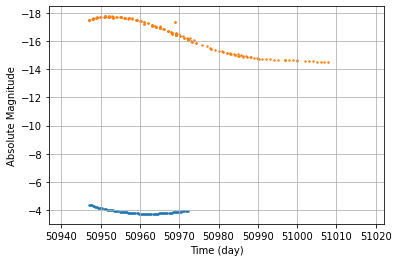

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[4.25414732e-05 4.43332474e-05 4.47885069e-05 4.47885069e-05
 5.38575616e-05 5.44974078e-05 5.61810155e-05 5.73633347e-05
 5.73633347e-05 6.72925829e-05 6.77235634e-05 6.98978654e-05
 7.16599952e-05 7.16599952e-05 8.29286029e-05 8.30851363e-05
 8.56031052e-05 9.83409225e-05 1.00966252e-04 1.01295139e-04
 1.01788735e-04 1.01788735e-04 1.03436152e-04 1.03436152e-04
 1.14676166e-04 1.18961835e-04 1.18961835e-04 1.19619188e-04
 1.19619188e-04 1.31133890e-04 1.32882358e-04 1.35246623e-04
 1.35246623e-04 1.36341421e-04 1.36341421e-04 1.46492025e-04
 1.48813841e-04 1.60069456e-04 1.63525981e-04 1.63525981e-04
 1.63765620e-04 1.63765620e-04 1.71899936e-04 1.73744782e-04
 1.73744782e-04 1.74212851e-04 1.74212851e-04 1.80327127e-04
 1.81912200e-04 1.81912200e-04 1.82035942e-04 1.82035942e-04
 1.85583449e-04 1.85659371e-04 1.87782198e-04 1.87803147e-04
 1.87771657e-04 1.87771657e-04 1.86113228e-04 1.86113228e-04
 1.85708032e-04 1.85708032e-04 1.81520287e-04 1.81520287e-04
 1.81341798e-04 1.813417

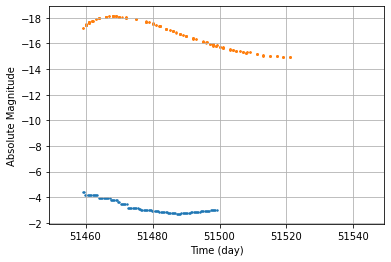

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[4.24767809e-05 4.24767809e-05 6.69565042e-05 6.69565042e-05
 6.69565042e-05 6.69565042e-05 6.72918938e-05 6.72918938e-05
 7.10755464e-05 7.10755464e-05 7.10755464e-05 7.10755464e-05
 7.10755464e-05 1.09744880e-04 1.09744880e-04 1.10250276e-04
 1.10250276e-04 1.11266767e-04 1.11266767e-04 1.11266767e-04
 1.11266767e-04 1.11266767e-04 1.11266767e-04 1.68310870e-04
 1.68310870e-04 1.69022601e-04 1.69022601e-04 1.70453138e-04
 1.70453138e-04 2.52817204e-04 2.52817204e-04 3.61548366e-04
 3.61548366e-04 3.69120551e-04 3.69120551e-04 3.70393056e-04
 3.70393056e-04 6.80628250e-04 6.80628250e-04 6.80628250e-04
 6.80628250e-04 6.80628250e-04 6.84323193e-04 6.84323193e-04
 6.86174461e-04 6.86174461e-04 8.62279810e-04 8.62279810e-04
 1.08781543e-03 1.08781543e-03 1.08781543e-03 1.08781543e-03
 1.08781543e-03 1.09437035e-03 1.09437035e-03 1.09655654e-03
 1.09655654e-03 1.30721951e-03 1.30721951e-03 1.30940046e-03
 1.30940046e-03 1.30940046e-03 1.30940046e-03 1.50092958e-03
 1.50298481e-03 1.502984

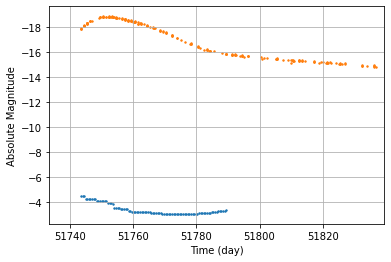

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[3.25652676e-05 3.27212025e-05 3.27212025e-05 5.01938647e-05
 5.06398684e-05 5.06398684e-05 5.06398684e-05 5.13148813e-05
 5.15414951e-05 5.15414951e-05 7.54715347e-05 7.60879428e-05
 7.76460659e-05 7.76460659e-05 7.95483077e-05 7.98688180e-05
 7.98688180e-05 1.16780738e-04 1.16780738e-04 1.16780738e-04
 1.41522129e-04 2.86170082e-04 2.94543804e-04 2.94543804e-04
 2.94543804e-04 3.67978478e-04 3.69665484e-04 3.75590976e-04
 3.75590976e-04 3.75590976e-04 4.54073412e-04 4.64758767e-04
 5.45963845e-04 5.45963845e-04 5.46849309e-04 5.52155145e-04
 5.53038240e-04 5.53038240e-04 6.02603809e-04 6.33656450e-04
 6.37765658e-04 6.38584774e-04 6.38584774e-04 6.38584774e-04
 6.85853487e-04 7.14966203e-04 7.14966203e-04 7.14966203e-04
 7.15666030e-04 7.49364221e-04 7.72280412e-04 8.20081473e-04
 8.20081473e-04 8.20782682e-04 8.43545174e-04 8.43877474e-04
 8.45415733e-04 8.45698766e-04 8.45698766e-04 8.45698766e-04
 8.49693853e-04 8.49637296e-04 8.49578835e-04 8.49578835e-04
 8.35251410e-04 8.345493

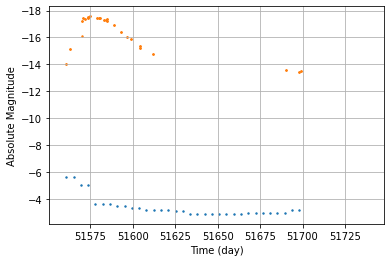

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[2.29087991e-06 2.29087991e-06 8.64750637e-06 8.64750637e-06
 2.32238391e-04 2.32238391e-04 2.33820043e-04 3.18321446e-04
 3.18321446e-04 4.22478234e-04 4.22478234e-04 6.77294607e-04
 6.77294607e-04 6.83984064e-04 6.83984064e-04 8.14021689e-04
 8.14021689e-04 1.21713761e-03 1.21713761e-03 1.25479747e-03
 1.25479747e-03 1.26113109e-03 1.26113109e-03 1.19033621e-03
 1.19033621e-03 1.09386335e-03 1.09386335e-03 1.04539636e-03
 1.04539636e-03 1.04539636e-03 1.04539636e-03 7.02882988e-04
 7.02882988e-04]
piece 2 is [7.176532491688824, 7.176532491688824, 4.7018647421257995, 4.7018647421257995, 3.049879375487998, 3.049879375487998, 2.651437752052245, 2.651437752052245, 2.3017586688725897, 2.3017586688725897, 1.2942859895472807, 1.2942859895472807, 1.2905933073487053, 1.2905933073487053, 1.1155948440783143, 1.1155948440783143, 0.847980228267781, 0.847980228267781, 0.5571627122497852, 0.5571627122497852, 0.5555730907551152, 0.5555730907551152, 0.550045046137636, 0.550045046137636, 0.54847573180

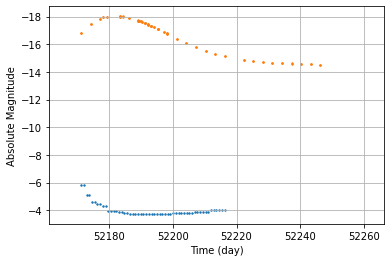

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.53367851e-06 1.53367851e-06 7.35945460e-06 7.35945460e-06
 2.61169390e-05 2.61169390e-05 3.66190912e-05 3.66190912e-05
 4.97598076e-05 4.97598076e-05 1.22440048e-04 1.22440048e-04
 1.22823914e-04 1.22823914e-04 1.41704497e-04 1.41704497e-04
 1.70330451e-04 1.70330451e-04 1.85815637e-04 1.85815637e-04
 1.85791460e-04 1.85791460e-04 1.85693774e-04 1.85693774e-04
 1.85662146e-04 1.85662146e-04 1.82755968e-04 1.82755968e-04
 1.82078571e-04 1.82078571e-04 1.76113503e-04 1.76113503e-04
 1.75027782e-04 1.75027782e-04 1.65518896e-04 1.65518896e-04
 1.65303728e-04 1.65303728e-04 1.55331164e-04 1.55331164e-04
 1.53756163e-04 1.53756163e-04 1.42087920e-04 1.42087920e-04
 1.29584595e-04 1.29584595e-04 1.28554474e-04 1.28554474e-04
 1.05172965e-04 1.05172965e-04 9.37884070e-05 9.37884070e-05
 9.28087043e-05 9.28087043e-05]
piece 2 is [6.954491814816452, 6.071911527317282, 5.263605912269724, 4.562903638341017, 3.9554803227675235, 3.4289184747038814, 2.976703042678679, 2.9135951200458026, 2.872268

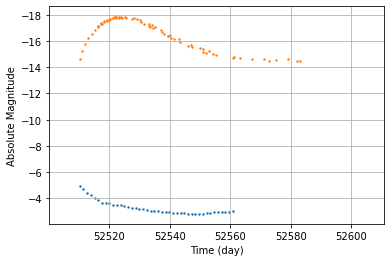

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.19855490e-05 2.07202520e-05 3.55007923e-05 5.85290019e-05
 9.28814953e-05 1.41927190e-04 2.08140160e-04 2.19874067e-04
 2.27956756e-04 2.96344459e-04 3.20535154e-04 3.30984022e-04
 4.04144456e-04 4.34649512e-04 5.34914654e-04 5.68739880e-04
 6.57159961e-04 6.81542331e-04 7.18637677e-04 8.37451229e-04
 8.77577323e-04 9.73654704e-04 9.97437067e-04 1.03669370e-03
 1.15013385e-03 1.18597707e-03 1.26666623e-03 1.31553385e-03
 1.39458193e-03 1.41690893e-03 1.51471500e-03 1.51375603e-03
 1.48377234e-03 1.42522727e-03 1.40615642e-03 1.32136889e-03
 1.16165712e-03 1.14803096e-03 1.11961863e-03 1.04268718e-03
 1.00401874e-03 9.39313987e-04]
piece 2 is [9.522652837521797, 8.243192886572457, 7.176532491688824, 4.041155283052806, 3.0325011925806837, 2.6438730275144313, 2.4784821252518014, 1.4866579472164883, 1.2905933073487053, 1.123591905612306, 0.9712380574194608, 0.9698515650674857, 0.9076563984934459, 0.8455608854657886, 0.7319516520416035, 0.6821046106183802, 0.5508313863129581, 0.450551791

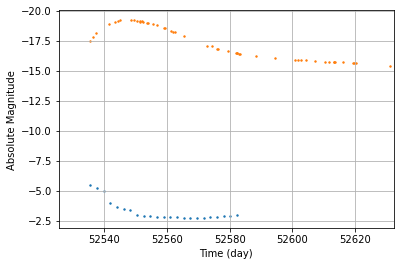

[3.10923357e-06 6.17332901e-06 1.14741776e-05 1.00300066e-04
 2.33779074e-04 3.31595518e-04 3.86260220e-04 9.91886765e-04
 1.18882935e-03 1.37519366e-03 1.55113768e-03 1.55271894e-03
 1.62241099e-03 1.68824932e-03 1.79074222e-03 1.82416878e-03
 1.85662257e-03 1.79996304e-03 1.60848025e-03 1.54075919e-03
 1.29055734e-03 1.23526565e-03 1.16394694e-03]
piece 2 is [4.655080406248078, 4.035386325736556, 3.9329420345034705, 3.609876168447511, 3.599576956705207, 3.488206666826825, 3.1743473139912335, 3.0325011925775316, 2.835931946952981, 2.7166180836396263, 2.606371915689774, 2.6026511855352044, 2.298472789817393, 2.249743762798615, 2.195765235110471, 2.1436145995702667, 2.047317935179802, 1.9726696055324642, 1.9034603553570282, 1.7596273273696945, 1.7100636845450017, 1.4930430109233663, 1.3756185291976923, 1.2905933073487053, 1.1155948440771546, 1.104494489910062, 1.053633743672817, 0.7963192529171437, 0.7414232171528665, 0.7133699693573331, 0.5898427000254343, 0.4906418650916759, 0.4707305

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


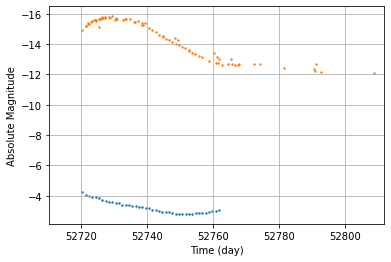

[5.76344689e-05 9.19076606e-05 9.95598896e-05 1.28834191e-04
 1.29915665e-04 1.42287349e-04 1.84914999e-04 2.08747097e-04
 2.47647566e-04 2.75158925e-04 3.03611422e-04 3.04626694e-04
 4.01679802e-04 4.20137700e-04 4.41653874e-04 4.63563623e-04
 5.07107642e-04 5.43809917e-04 5.80300640e-04 6.64309540e-04
 6.95974932e-04 8.52206278e-04 9.48952206e-04 1.02412201e-03
 1.18980354e-03 1.20065804e-03 1.25060729e-03 1.48931747e-03
 1.53000979e-03 1.54807287e-03 1.59576038e-03 1.57838341e-03
 1.56666573e-03 1.51113079e-03 1.43037096e-03 1.41560606e-03
 1.38550714e-03 1.33337518e-03 1.21051025e-03 1.09632967e-03
 9.69562058e-04 8.72218488e-04]
piece 2 is [8.254434839724848, 7.054091161460337, 6.963976255160945, 6.748512031566914, 5.278741700944472, 5.271876264081237, 4.584517647842161, 4.577397532334468, 4.122521117592547, 3.983573113171414, 3.51800289557043, 3.3368802931491546, 2.565566170931972, 2.2385423063945002, 1.9781838645811627, 1.946993380485059, 1.9060562684257634, 1.6641625781071123, 

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


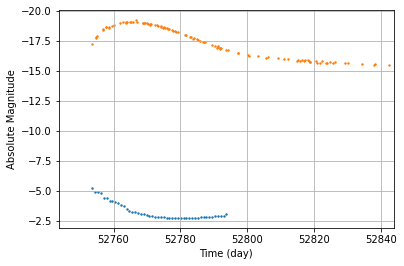

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[6.06954129e-06 1.22060140e-05 1.28962967e-05 1.47323650e-05
 3.90116638e-05 3.92012063e-05 6.47124798e-05 6.50606047e-05
 9.23832603e-05 1.03156407e-04 1.51011158e-04 1.76017017e-04
 3.48997553e-04 4.73444207e-04 6.06420375e-04 6.24789133e-04
 6.49768066e-04 8.19177512e-04 8.98348604e-04 1.00823338e-03
 1.16148707e-03 1.22282452e-03 1.52068286e-03 1.53330760e-03
 1.56422196e-03 1.61497518e-03 1.69975529e-03 1.72372859e-03
 1.75929055e-03 1.77321503e-03 1.79011985e-03 1.81502893e-03
 1.80452532e-03 1.79475480e-03 1.75839090e-03 1.74126390e-03
 1.71080267e-03 1.68998115e-03 1.65215053e-03 1.58806755e-03
 1.54035654e-03 1.51563455e-03 1.42143873e-03 1.36476147e-03
 1.28983698e-03 1.23791412e-03 1.17405278e-03 9.34125332e-04]
piece 2 is [7.373896961738784, 6.398371273017818, 5.547517954069014, 5.346973031285876, 5.339339951880203, 4.77524316841817, 4.68845001588015, 4.68175701199714, 4.266596029480663, 4.152345973686189, 4.142356786475009, 4.064313702849891, 4.064313702849891, 3.614231272

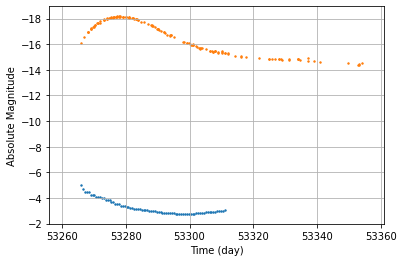

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.01538231e-05 1.83996594e-05 3.21679647e-05 3.69209602e-05
 3.71169579e-05 5.54703877e-05 5.91208155e-05 5.94134092e-05
 8.12170009e-05 8.87145704e-05 8.94064204e-05 9.50263266e-05
 9.50263266e-05 1.36361136e-04 1.48217274e-04 1.48217274e-04
 1.94249511e-04 2.04812233e-04 2.96911666e-04 3.12876138e-04
 3.12876138e-04 4.10206861e-04 4.35263421e-04 4.36592175e-04
 5.32596555e-04 5.49976604e-04 5.81456043e-04 5.83018643e-04
 6.85486854e-04 7.24404728e-04 7.48963200e-04 7.48963200e-04
 8.68632316e-04 8.89236267e-04 9.29129341e-04 9.29129341e-04
 1.05134779e-03 1.07485896e-03 1.11410250e-03 1.11593925e-03
 1.25717468e-03 1.28400700e-03 1.28572797e-03 1.42068010e-03
 1.44985618e-03 1.45133389e-03 1.54700256e-03 1.55871893e-03
 1.57596697e-03 1.57596697e-03 1.65663275e-03 1.67652725e-03
 1.67652725e-03 1.69691963e-03 1.72851901e-03 1.72884416e-03
 1.73620875e-03 1.74102651e-03 1.74108901e-03 1.72488224e-03
 1.67465318e-03 1.57059605e-03 1.46561028e-03 1.45660989e-03
 1.45547581e-03 1.422162

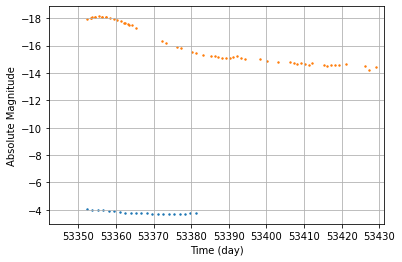

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[9.00578889e-05 1.06565656e-04 1.09162415e-04 1.11426059e-04
 1.25730012e-04 1.26077460e-04 1.42627575e-04 1.57543762e-04
 1.58718659e-04 1.70986839e-04 1.72627926e-04 1.84644885e-04
 1.92535548e-04 1.97674569e-04 1.99234183e-04 1.97835615e-04
 1.97305079e-04 1.93141696e-04 1.92586671e-04 1.85004070e-04
 1.76603266e-04]
piece 2 is [1.4887960230586734, 1.2905933073487053, 1.1125375300753244, 0.9654198013854903, 0.8373543346528506, 0.7264566040802176, 0.6284083392753356, 0.5448389121532028, 0.47055643148515897, 0.4087222750257547, 0.35711684819133516, 0.26830961821262306, 0.23321486055246077, 0.2007121125524623, 0.1741159759294742]
piece 3 is [0.36056043130946425, 0.475050524053953, 0.6125451933115998, 0.7581784278880945, 0.9134946052388119, 1.0719227998663419, 1.2306676211744614, 1.378007398699173, 1.5149680613544356, 1.6294610508747325, 1.721824165701842, 1.8623810042184417, 1.907231313652881, 1.9413882408098262, 1.9633915672139708]
-1.4163147710868251
-1.3585988255078356
-1.3126752291

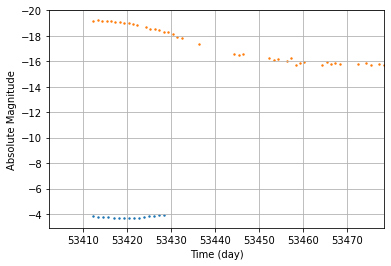

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[0.00014515 0.00016129 0.00017603 0.00018753 0.00019602 0.00020113
 0.00020279 0.00020101 0.00019597 0.0001885  0.00017941 0.00015607
 0.00014363 0.00013025 0.00011789]
piece 2 is [2.302735479402699, 1.4454767293714492, 1.2905933073487053, 1.2656452115648713, 1.1776950534454418, 1.0181476001680203, 1.0173057948472277, 1.0163993434738192, 0.9766448098354814, 0.9538249623000483, 0.8864003832596201, 0.8233137208157253, 0.7669193190234328, 0.716777800736877, 0.6603699293015763, 0.5417290080333909, 0.5025252519100253, 0.4105310664280803, 0.40362255721372126, 0.355733411246054, 0.34939198658744725, 0.3086193832938444, 0.18764521658158567]
piece 3 is [0.12728910246866934, 0.3826861264785014, 0.475050524053953, 0.4921093757285956, 0.5577910373126094, 0.7022227501944137, 0.7030817721733407, 0.7040079820930469, 0.7458943400018486, 0.7710836601133336, 0.8506244643424822, 0.9322950082268826, 1.0114734125136682, 1.0868310488723814, 1.177082623451816, 1.3836586365347223, 1.4556248765061754, 1.626148

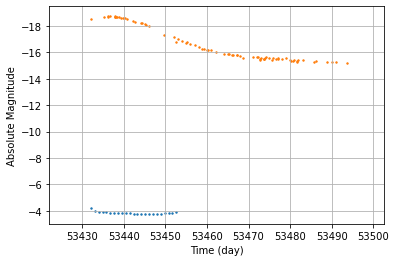

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[6.49066932e-05 1.12627979e-04 1.24281098e-04 1.26233482e-04
 1.33246877e-04 1.46231986e-04 1.46300285e-04 1.46373814e-04
 1.49581050e-04 1.51401265e-04 1.56637381e-04 1.61239223e-04
 1.64977639e-04 1.67882063e-04 1.70510090e-04 1.72746674e-04
 1.72101183e-04 1.66629571e-04 1.65944371e-04 1.59897546e-04
 1.58911720e-04 1.51397364e-04 1.14267015e-04]
piece 2 is [7.0510283355646175, 6.540144000642384, 6.4198050750645885, 6.4198050750645885, 6.114301970431338, 5.994343811531042, 5.994343811531042, 5.589089124258826, 5.509812603015024, 5.509812603015024, 5.362271942266796, 5.362271942266796, 5.276630626505603, 4.845057841554073, 4.668399654419606, 4.668399654419606, 4.631664591700179, 4.466167294251224, 4.466167294251224, 4.248349745035386, 4.212090935541048, 4.140499060265825, 4.140499060265825, 4.011361108360389, 3.978147769924185, 3.978147769924185, 3.81071306018042, 3.703905320738971, 3.479944434391781, 3.3996533460757132, 3.3996533460757132, 3.301111347255728, 3.0131121135226144, 2.86

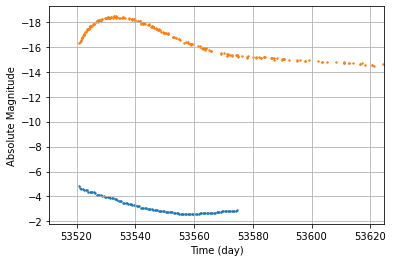

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.56495253e-05 2.15928078e-05 2.33387628e-05 2.33387628e-05
 2.85311772e-05 3.09164206e-05 3.09164206e-05 4.08016480e-05
 4.31271945e-05 4.31271945e-05 4.78640972e-05 4.78640972e-05
 5.08812650e-05 6.97541603e-05 7.96665347e-05 7.96665347e-05
 8.19216245e-05 9.30144297e-05 9.30144297e-05 1.10283908e-04
 1.13495728e-04 1.20151329e-04 1.20151329e-04 1.33297580e-04
 1.36935188e-04 1.36935188e-04 1.57059020e-04 1.71625508e-04
 2.07361799e-04 2.22147006e-04 2.22147006e-04 2.41929399e-04
 3.11971613e-04 3.58127219e-04 3.59539598e-04 3.59539598e-04
 3.98311997e-04 4.12849909e-04 4.12849909e-04 4.41485459e-04
 4.41485459e-04 4.71281510e-04 5.58573512e-04 6.33661940e-04
 6.33661940e-04 8.33066853e-04 8.78597619e-04 8.78597619e-04
 8.78597619e-04 8.78597619e-04 9.72945404e-04 1.05889399e-03
 1.05889399e-03 1.07327074e-03 1.15130309e-03 1.15130309e-03
 1.24335818e-03 1.28263371e-03 1.33967661e-03 1.33967661e-03
 1.52086901e-03 1.59367803e-03 1.59367803e-03 1.69235296e-03
 1.69235296e-03 1.781199

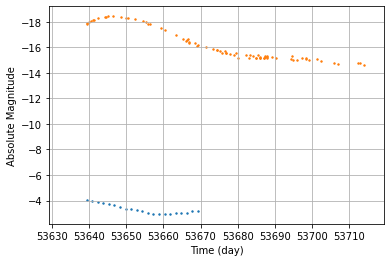

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[9.61056126e-05 1.01038690e-04 1.21604338e-04 1.48200864e-04
 1.77173579e-04 2.02684225e-04 2.92490286e-04 4.72845253e-04
 4.86354685e-04 5.47232960e-04 7.15242952e-04 9.32658519e-04
 1.03980671e-03 1.07072826e-03 1.10560267e-03 1.04399754e-03
 9.98887933e-04 9.60567926e-04 9.19700897e-04 7.09500467e-04
 6.26392090e-04]
piece 2 is [2.2887478965292534, 1.990970166549884, 1.7915259721697487, 1.7871804022795093, 1.5713339337599466, 1.5026098096579288, 1.3455219986090345, 1.2905933073487053, 1.183016763353036, 1.18031581301379, 0.8489013924853611, 0.6303279105678686, 0.5039803704524843, 0.4749916950600761, 0.35778068142047126, 0.32958129113263346, 0.283430201838184, 0.21464079097333758, 0.18508645386036765]
piece 3 is [0.12943094709536646, 0.18643011477667315, 0.2406203206555645, 0.2419857919273085, 0.32225344751945206, 0.3538083162915183, 0.43973681792510977, 0.475050524053953, 0.5535575178238884, 0.5557018208646884, 0.8983027278082634, 1.2274020055210069, 1.4529338825886646, 1.5067180980

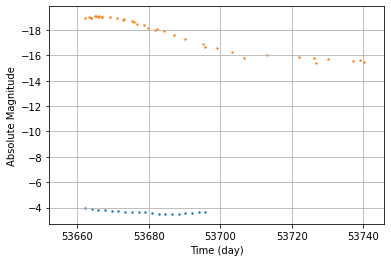

[0.00011539 0.00013997 0.00015967 0.00016013 0.00018481 0.00019343
 0.00021445 0.00022221 0.00023791 0.00023832 0.00028745 0.00031105
 0.00031341 0.00031188 0.00029373 0.00028568 0.00026851 0.00023188
 0.00021137]
piece 2 is [7.13971935379664, 5.707366763848986, 5.354762364459772, 5.1033674810899345, 4.646954416466251, 4.332061255990809, 3.250798349723558, 2.41859387166499, 1.8857243936970087, 1.6284369237332723, 1.2905933073487053, 0.92023338737287, 0.6695835093288057, 0.5053379027113507, 0.4514447674224419, 0.3594780197358147, 0.2542690692502305, 0.2495135030289147, 0.18590342525220038]
piece 3 is [0.0018766726604966175, 0.005180287727764081, 0.006803269229833544, 0.008315006987905816, 0.012147175453119543, 0.01596985628521165, 0.04468541955866567, 0.1110248220553434, 0.213065697558125, 0.29842738564205185, 0.475050524053953, 0.8097382542255736, 1.161956167509545, 1.450424456469549, 1.550518834571785, 1.7177149324470087, 1.8812316787686914, 1.8873505575344178, 1.954326285993671]
-3.0

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


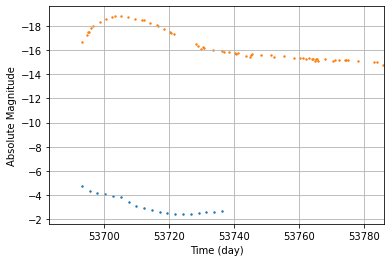

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.89041410e-05 4.91021834e-05 6.32517091e-05 7.61438672e-05
 1.07843833e-04 1.38357540e-04 3.46399209e-04 7.53347156e-04
 1.27375546e-03 1.64554470e-03 2.28326875e-03 3.12495662e-03
 3.57589802e-03 3.60079080e-03 3.52006763e-03 3.23953938e-03
 2.65144323e-03 2.61755159e-03 2.10462646e-03]
piece 2 is [2.018304404294512, 1.5048181206274733, 1.3162268331613436, 1.2905933073487053, 0.9726265318902584, 0.7881705202121934, 0.7484992313520057, 0.7350953193112176, 0.48403366624529504, 0.3158053021389302, 0.2849420685117361, 0.20685484590933242, 0.17946448259501743, 0.17566374107505547, 0.15315167165536447, 0.1514113305849712]
piece 3 is [0.18014662443538498, 0.35274207288580184, 0.45819657440380535, 0.475050524053953, 0.7502682196570858, 0.9809437693812911, 1.0386155195975253, 1.0587622686393539, 1.489910465960329, 1.7910791259761818, 1.8386406314902914, 1.935526343308947, 1.9594151340106485, 1.9622643175186867, 1.9767750759282932, 1.9777290210407672]
-1.585515238983861
-1.4211867607354396
-1

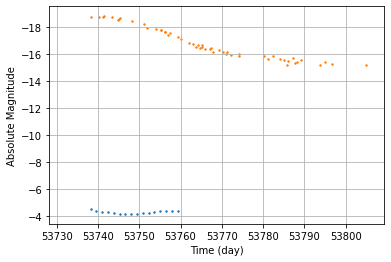

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[3.18188040e-05 4.45517446e-05 5.03393115e-05 5.11676446e-05
 6.18820001e-05 6.76588633e-05 6.87107022e-05 6.90419368e-05
 7.11918987e-05 6.37877263e-05 6.10218798e-05 5.12770480e-05
 4.67813167e-05 4.61088503e-05 4.18740798e-05 4.15284990e-05]
piece 2 is [8.136469198623509, 6.907736675733735, 6.3766719704380055, 5.4940299596518, 5.255633832819576, 4.838832484346246, 4.538511903088299, 4.181950460720682, 3.46644364997873, 2.582204443011846, 2.238679821074103, 2.042588252919311, 1.538739337840625, 1.3407500332404432, 1.2905933073487053, 1.1610999111189295, 0.8264860461717988, 0.7587689518579632, 0.716130944832775, 0.6607681580560865, 0.5315993887148902, 0.4713557110250604, 0.3030983437855995, 0.242362481434556, 0.22903753335259436, 0.1968628551987922, 0.15781876533253106]
piece 3 is [0.000994628576105913, 0.002192459958949023, 0.003169031208365844, 0.006101621734697355, 0.00735861609691816, 0.010332883284872361, 0.013331763128559663, 0.018263523347816772, 0.03594724017075789, 0.09194156

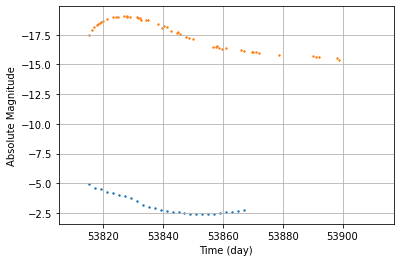

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.04537292e-05 2.21771149e-05 3.13938512e-05 5.79267038e-05
 6.89157628e-05 9.42401654e-05 1.18995967e-04 1.58379191e-04
 2.90165162e-04 6.53016317e-04 9.11295214e-04 1.10613603e-03
 1.82570511e-03 2.21188729e-03 2.31904400e-03 2.61030927e-03
 3.37807575e-03 3.50597782e-03 3.57410667e-03 3.64319734e-03
 3.68058762e-03 3.61456555e-03 3.01136186e-03 2.60774047e-03
 2.50509800e-03 2.23701780e-03 1.87554622e-03]
piece 2 is [2.873848409578176, 2.480816537808811, 2.2598904225947485, 1.8925117176962218, 1.2905933073487053, 1.0246831771915268, 0.8933655889576007, 0.799325900727995, 0.7733333340678665, 0.6922352754291854, 0.5996104395542534, 0.5201545043676242, 0.47359929999277667, 0.44803703267863276, 0.41181863004351593, 0.3892843980737301, 0.3562236444553277, 0.2916241720445622, 0.26649777410042585, 0.21379035626326043]
piece 3 is [0.06649743476607403, 0.10327794290893738, 0.13398114105315334, 0.21122294912939832, 0.475050524053953, 0.6955904916903661, 0.8420439465828052, 0.9652537702829793

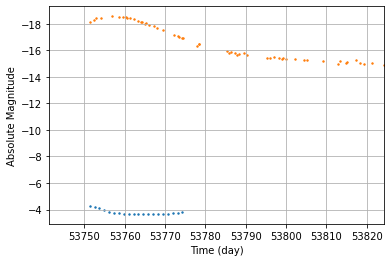

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[5.49930130e-05 6.99907040e-05 8.05041178e-05 1.02211748e-04
 1.51843433e-04 1.78708785e-04 1.91884455e-04 2.00543789e-04
 2.02728773e-04 2.08668138e-04 2.13075540e-04 2.13748507e-04
 2.12260766e-04 2.10700143e-04 2.07427623e-04 2.04680993e-04
 1.99526149e-04 1.84883029e-04 1.77268065e-04 1.57146873e-04]
piece 2 is [8.349861049610888, 7.721967458262382, 6.95804945029511, 6.247896817768186, 5.05828632557565, 4.675073562726765, 4.4611616139272385, 4.447391547008586, 3.839910978598221, 2.8740495860103255, 2.647652688095087, 2.515184917089166, 2.1815982602898267, 1.8777968168147845, 1.2905933073487053, 1.0461854163783098, 0.9077251236507161, 0.7956506256086492, 0.6863811145891782, 0.5524074407083067, 0.5236856530305688, 0.44961882890598814, 0.3141907158790356, 0.23476185222205428, 0.19512635436005135, 0.15402932926984442]
piece 3 is [0.0008738219937987658, 0.001287104095643643, 0.002119172703397387, 0.003474726296132898, 0.008624728150828065, 0.01185989953909286, 0.01425725059853524, 0.014

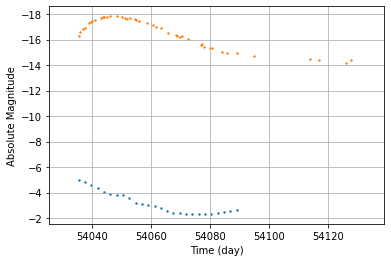

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.07272670e-05 1.56415213e-05 2.53456530e-05 4.07587632e-05
 9.65440276e-05 1.30078355e-04 1.54371341e-04 1.56101330e-04
 2.59195328e-04 6.20629501e-04 7.71064759e-04 8.77301399e-04
 1.22171745e-03 1.66105262e-03 2.98656064e-03 3.72395098e-03
 4.14897966e-03 4.45974386e-03 4.69145668e-03 4.79115847e-03
 4.77315756e-03 4.64024819e-03 3.98532442e-03 3.30185534e-03
 2.87514282e-03 2.37775539e-03]
piece 2 is [7.916805314758613, 7.854082571362925, 7.839599548830982, 7.207355060693918, 5.05015625137088, 5.001963884640832, 4.952052023184703, 4.831627992627375, 4.181412815939893, 3.290936059306242, 2.8496056384847437, 2.718442711125532, 2.651437752052245, 2.5808067421626277, 2.502944290478587, 2.5016288027264055, 2.5003282939096443, 2.355026643084778, 2.256503128065594, 2.23504013114469, 2.1788947549670867, 2.1777526909847498, 2.176617444511251, 2.0390518042417405, 2.003913544483254, 1.9744740139180652, 1.887508593733831, 1.7685258147492946, 1.7606079643192816, 1.7439115583483846, 1.599860321

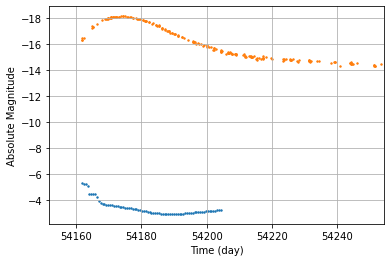

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[5.52495013e-06 5.72302642e-06 5.76989299e-06 8.30804237e-06
 3.34178417e-05 3.45798339e-05 3.58317156e-05 3.90688889e-05
 6.34370129e-05 1.29949527e-04 1.90060052e-04 2.13480894e-04
 2.26663338e-04 2.41537067e-04 2.59186127e-04 2.59496180e-04
 2.59803102e-04 2.96718897e-04 3.24964204e-04 3.31492982e-04
 3.49244202e-04 3.49615635e-04 3.49985268e-04 3.97987282e-04
 4.11324458e-04 4.22855926e-04 4.58903881e-04 5.13322223e-04
 5.17163236e-04 5.25355362e-04 6.01401536e-04 6.09971709e-04
 7.19884933e-04 7.74867643e-04 7.98080744e-04 8.57028365e-04
 9.20741157e-04 9.73421267e-04 1.04163162e-03 1.07470235e-03
 1.12390007e-03 1.13316012e-03 1.18148473e-03 1.19766697e-03
 1.21560847e-03 1.22648239e-03 1.23204256e-03 1.23618020e-03
 1.23536999e-03 1.22821758e-03 1.22661752e-03 1.22119993e-03
 1.21634425e-03 1.18103764e-03 1.17599636e-03 1.12302497e-03
 1.10862578e-03 1.03160326e-03 1.02698634e-03 1.00190109e-03
 9.59912373e-04 9.53910597e-04 9.50343054e-04 8.85084871e-04
 8.79256539e-04 8.729567

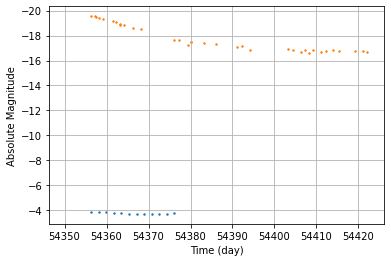

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[0.00012912 0.00014463 0.00014644 0.00015812 0.00017423 0.00019566
 0.00019932 0.0002009  0.00020088 0.00019924 0.00018621 0.00016534]
piece 2 is [2.0453534530650224, 1.764699837609064, 1.5251837551161997, 1.2905933073487053, 0.99802256994054, 0.9754094385258452, 0.9735704373452403, 0.638148876910598, 0.3598597825477878, 0.3200747181175952, 0.27081305486010016, 0.23823425698907907, 0.2109094191910053, 0.20417963639669398, 0.2026395425765019, 0.17942192892066447, 0.17584250709429478, 0.15293303975578001, 0.1524583746253033]
piece 3 is [0.17416505901920443, 0.24919136187037416, 0.3430766575715749, 0.475050524053953, 0.7230603296804592, 0.747236254607145, 0.7492384322687551, 1.2141582839895901, 1.7170492434053162, 1.7841868818236244, 1.8589019517715615, 1.901293741644234, 1.9315016507988128, 1.9381143701287624, 1.9395797386360447, 1.9594476707947228, 1.9621328887829503, 1.9768962272208321, 1.9771579574232858]
-1.5943986360836386
-1.5029242063672756
-1.4274146944586137
-1.3585988255078356


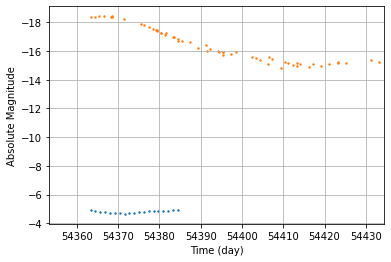

[1.17544096e-05 1.38000525e-05 1.57955561e-05 1.79284113e-05
 2.05967459e-05 2.07865228e-05 2.08017534e-05 2.25483424e-05
 1.99283424e-05 1.89114757e-05 1.73247967e-05 1.60521643e-05
 1.48349832e-05 1.45132601e-05 1.44383893e-05 1.32525931e-05
 1.30601394e-05 1.17663851e-05 1.17384392e-05]
piece 2 is [5.2054285908332325, 4.844137368017561, 4.2981631417747135, 3.6253543701680533, 3.1194577345087158, 2.2498723232572724, 2.0791500568202945, 1.7929623277635325, 1.6330659250263093, 1.2905933073487053, 1.1737479920399603, 1.015923199343282, 0.9777532326058477, 0.882367599246433, 0.7134311179752625, 0.6612591967652589, 0.5788051492996731, 0.5466375077396552, 0.5001632087481724, 0.43122569421317614, 0.4012103651918028, 0.37557896737778457, 0.32632847387248465, 0.31588742219252586, 0.23216377145793435, 0.15988631542332504, 0.15277145311026474]
piece 3 is [0.007659415429459736, 0.010287298115379928, 0.016457625178550195, 0.030751331856110196, 0.05119212657426759, 0.13560329804733542, 0.167006795

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


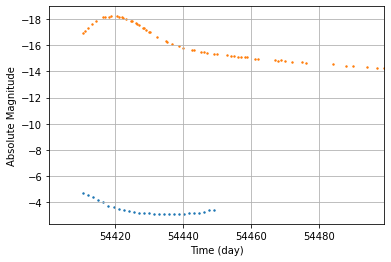

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[2.01631452e-05 2.59065326e-05 3.84749386e-05 6.45753861e-05
 9.76409923e-05 2.08821286e-04 2.43980313e-04 3.17478593e-04
 3.67806283e-04 5.00241447e-04 5.52372908e-04 6.25583770e-04
 6.43221459e-04 6.85793566e-04 7.47690582e-04 7.60172247e-04
 7.69393577e-04 7.68526119e-04 7.61767848e-04 7.37323553e-04
 7.20344809e-04 7.02403371e-04 6.58196822e-04 6.47076280e-04
 5.34196138e-04 4.02509237e-04 3.87935140e-04]
piece 2 is [1.3864259595486028, 1.3852321668728873, 1.2905933073487053, 1.2027568856832058, 1.2021230280626147, 1.2014963701624917, 1.0730774182364478, 0.9289256918494392, 0.9111498012475324, 0.9107619943143764, 0.910287220778987, 0.8383441935958459, 0.8084002702226081, 0.7835194541004196, 0.7831859696655367, 0.7827788188294079, 0.7359148820520649, 0.6011577142334174, 0.5461301513627106, 0.5280397714117095, 0.4618513259943609, 0.4450890892342587, 0.4448996487773319, 0.44466645538262356, 0.43381338912395667, 0.4092334973165291, 0.3328608259920035, 0.32100519917253795, 0.28834901541

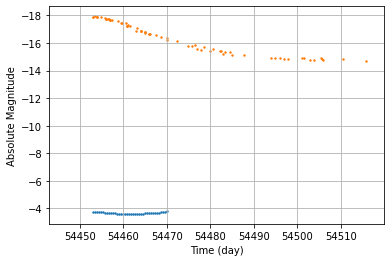

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[0.00016703 0.00016716 0.0001775  0.00018746 0.00018753 0.0001876
 0.00020256 0.00021927 0.00022127 0.00022131 0.00022136 0.00022913
 0.00023217 0.00023458 0.00023461 0.00023465 0.00023884 0.00024707
 0.00024799 0.00024786 0.00024516 0.00024382 0.0002438  0.00024378
 0.00024275 0.0002399  0.00022576 0.00022273 0.00021299 0.00021295
 0.0002129  0.00019849 0.00019844 0.00019839 0.00018293 0.00018288
 0.00018283 0.0001595 ]
piece 2 is [1.2905933073487053, 1.1416927629191964, 1.1409590534316199, 0.5601435185858725, 0.5419209688840931, 0.48463216327067665, 0.4666536435175176, 0.40947384639419726, 0.36457631233641263, 0.3603603354490966, 0.30903188604422754, 0.2739669064731306, 0.26870816204907333, 0.23256244005987237, 0.17579578943525728, 0.17526543662933605, 0.1558153427047237, 0.1521509369032189]
piece 3 is [0.475050524053953, 0.5873641164384263, 0.5879840471401179, 1.350346988449075, 1.383309526518133, 1.4887986911476023, 1.5222290654223893, 1.6280851413364914, 1.7087961072912345, 1.7161

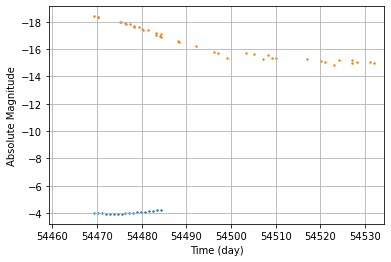

[9.31976984e-05 1.00293840e-04 1.00328423e-04 1.15871468e-04
 1.15418882e-04 1.13202847e-04 1.12228336e-04 1.08086136e-04
 1.03549978e-04 1.03058600e-04 9.60705826e-05 9.01230172e-05
 8.91413493e-05 8.17171795e-05 6.74949665e-05 6.73465000e-05
 6.16961311e-05 6.05865591e-05]
piece 2 is [5.667238946320878, 5.0624213574319175, 5.062204401071201, 4.347156880885255, 4.313910916783178, 4.12703480271454, 4.126327371694913, 3.25549217278597, 3.232557014444441, 3.0617533899668805, 3.0603103320668192, 2.2232892758105676, 2.2222731473093185, 1.2905933073487053, 1.2900771732282508, 1.0220852446600839, 1.021399217766957, 0.7132782562573338, 0.7130846784239608, 0.5499193359228365, 0.5498250721241884, 0.4527383943207366, 0.4524926887325915, 0.4462229648855686, 0.38805564658342384, 0.2531256210089632, 0.2293649636512637, 0.22930926749559005, 0.2197649900552683, 0.1627893965675726]
piece 3 is [0.005340804239002418, 0.00859577940608334, 0.008597295536427525, 0.015757959934177154, 0.0162289448286005, 0.

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


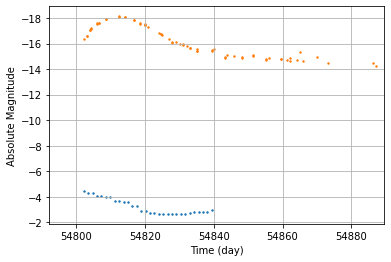

[3.48061528e-05 5.33268777e-05 5.33352667e-05 9.11966967e-05
 9.35854263e-05 1.08397984e-04 1.08458861e-04 2.23405942e-04
 2.27899341e-04 2.64719059e-04 2.65057140e-04 5.72508934e-04
 5.73063047e-04 1.39418359e-03 1.39483678e-03 1.75348987e-03
 1.75442992e-03 2.12385348e-03 2.12401431e-03 2.18749942e-03
 2.18748296e-03 2.12468841e-03 2.12439912e-03 2.11676813e-03
 2.02157735e-03 1.60210420e-03 1.49641250e-03 1.49615340e-03
 1.45097717e-03 1.15038128e-03]
piece 2 is [5.875950035357948, 5.609566643417132, 5.607082956805786, 5.034179795201046, 4.466537363448553, 4.337820533764348, 3.8179875689371254, 3.7105253463249084, 3.709836312784803, 3.3499051795249257, 2.935529233472509, 2.9339360930090193, 2.9089952745921708, 2.5201663165069785, 2.1404413387196706, 1.8113260179839308, 1.8112742665281305, 1.642602773520528, 1.5243799772674276, 1.5237485792057675, 1.291054315810802, 1.2905933073487053, 0.9307654571363291, 0.8071574449976034, 0.7886773641660773, 0.7883844812471225, 0.6739894531560467,

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


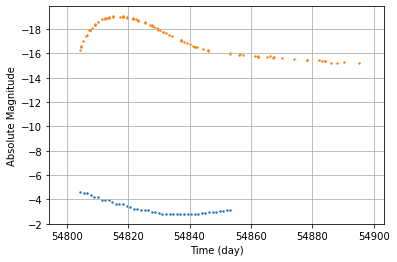

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[2.32383906e-05 2.77938212e-05 2.78407968e-05 4.15239830e-05
 6.30515271e-05 6.95391870e-05 1.04631059e-04 1.14160785e-04
 1.14224961e-04 1.54041671e-04 2.20381659e-04 2.20691684e-04
 2.25608895e-04 3.20272660e-04 4.56029596e-04 6.23162944e-04
 6.23193642e-04 7.31531017e-04 8.17794744e-04 8.18278986e-04
 1.01341322e-03 1.01383101e-03 1.35877971e-03 1.46808454e-03
 1.48262637e-03 1.48285176e-03 1.55506771e-03 1.55529412e-03
 1.56666361e-03 1.56094315e-03 1.56084439e-03 1.52634815e-03
 1.47405900e-03 1.47400489e-03 1.26761332e-03 1.26730244e-03
 1.06156361e-03 1.01686081e-03 1.01665611e-03 9.25254141e-04
 8.51424620e-04 8.00318141e-04 8.00075535e-04]
piece 2 is [2.222454111205947, 1.7516517215329155, 1.6759555318319828, 1.2905933073487053, 1.279128751997045, 1.0992998414646074, 0.9843557042579217, 0.56655355096881, 0.4636090375285014, 0.357220937410384, 0.30460022433181255, 0.27316496804282564, 0.19942026109186362, 0.17384133824903725]
piece 3 is [0.14015885826159885, 0.2534848990334312,

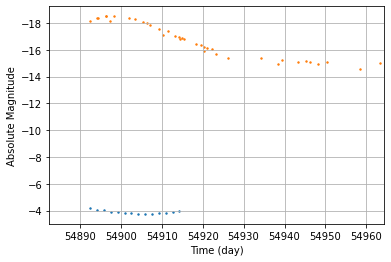

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[6.85243282e-05 9.32009086e-05 9.79875180e-05 1.26141534e-04
 1.27069303e-04 1.42081961e-04 1.51850648e-04 1.77484274e-04
 1.75744233e-04 1.65731086e-04 1.56300557e-04 1.48848639e-04
 1.24899748e-04 1.14166908e-04]
piece 2 is [8.21838295889838, 7.376836572166979, 7.03332230408154, 6.269175820750777, 5.277836851357404, 5.2288311054820396, 4.755161274489297, 4.5687087339961785, 4.410561655249062, 3.966174550351052, 3.7498518274835457, 3.5785042217822296, 3.4431042729390104, 3.392133870443431, 2.984751000746246, 2.6919705432328644, 2.6664417293472527, 2.6166687539564615, 2.2365732556728357, 2.1838776621516143, 1.9443833788910094, 1.911007542706559, 1.8933446060726487, 1.7171874605926547, 1.3029495932493862, 1.2905933073487053, 1.2783542000405956, 1.270271442957386, 0.954580145424454, 0.8903371194834424, 0.7426740988801914, 0.5019211492183563, 0.4185874761838355, 0.35267865614335253, 0.3110911298327919, 0.23172638943556062, 0.21649589911094522, 0.17882621398635337]
piece 3 is [0.0009461589

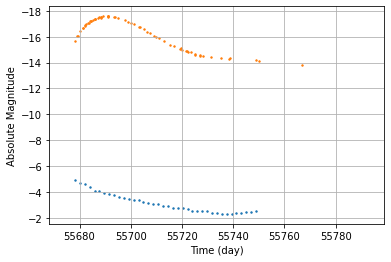

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[1.24434754e-05 2.07442406e-05 2.57947715e-05 4.27948705e-05
 8.67713929e-05 9.00040176e-05 1.29295629e-04 1.49787144e-04
 1.70051077e-04 2.45540238e-04 2.95401041e-04 3.42989304e-04
 3.86681424e-04 4.04710196e-04 5.87595878e-04 7.75504507e-04
 7.94789061e-04 8.33915613e-04 1.21180477e-03 1.27732287e-03
 1.62572818e-03 1.68159652e-03 1.71195249e-03 2.04652601e-03
 3.08812735e-03 3.12479721e-03 3.16140797e-03 3.18574034e-03
 4.19643210e-03 4.39933696e-03 4.80636953e-03 4.99259943e-03
 4.78285384e-03 4.46445140e-03 4.18307907e-03 3.45921950e-03
 3.29212986e-03 2.84195444e-03]
piece 2 is [14.365105559949154, 14.22847015599147, 13.873203637370679, 12.58891074112065, 12.535073713979685, 12.514497285285872, 12.316386509030547, 12.2168522009629, 12.09218267227447, 12.043566443377054, 11.958872474703853, 11.638473912458853, 11.410135516715254, 11.006990954492503, 10.975587292650356, 10.579480535814655, 10.560303736771525, 10.425397515693529, 10.372215164893534, 10.175113621100598, 9.7874606494

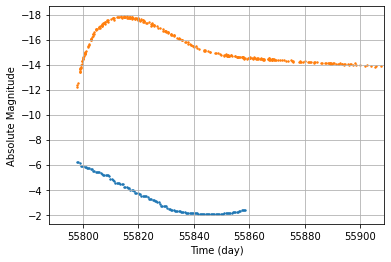

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[5.81400607e-07 6.18195359e-07 7.26442844e-07 1.33219172e-06
 1.36764096e-06 1.38146336e-06 1.52272318e-06 1.59965177e-06
 1.70211946e-06 1.74402354e-06 1.81977088e-06 2.14099234e-06
 2.40806663e-06 2.97419263e-06 3.02411548e-06 3.74016214e-06
 3.77930214e-06 4.06779696e-06 4.18815166e-06 4.66980764e-06
 5.80648026e-06 6.40578972e-06 6.68427980e-06 6.73706650e-06
 6.78277148e-06 6.92976717e-06 8.38141098e-06 1.45637272e-05
 1.47066643e-05 1.74992964e-05 1.86821606e-05 2.90247055e-05
 2.98436496e-05 3.00182651e-05 3.01435566e-05 3.52123252e-05
 3.54538614e-05 3.76959374e-05 5.86626604e-05 5.86893247e-05
 5.88228082e-05 6.86481893e-05 7.26933694e-05 1.09121145e-04
 1.10035078e-04 1.13007665e-04 1.34013813e-04 1.92742143e-04
 1.93630751e-04 1.94719178e-04 2.27398982e-04 2.36263893e-04
 3.28392514e-04 3.30095210e-04 3.30624540e-04 3.38597620e-04
 3.38719647e-04 3.98470634e-04 5.38948550e-04 5.42377029e-04
 5.62314020e-04 6.11480189e-04 6.40238897e-04 8.53773625e-04
 8.61423956e-04 9.575233

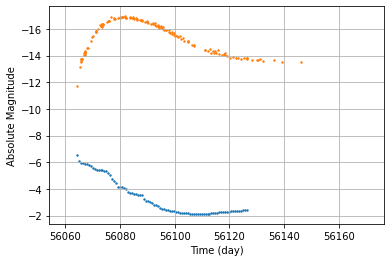

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


[2.92543112e-07 7.60828569e-07 1.12169741e-06 1.16679335e-06
 1.25973376e-06 1.31126841e-06 1.49526499e-06 1.77420376e-06
 2.81313428e-06 3.41276906e-06 3.60270862e-06 3.80552603e-06
 3.83703519e-06 4.01989487e-06 4.23319892e-06 4.46840019e-06
 6.78542215e-06 8.80906765e-06 1.89462851e-05 2.72808379e-05
 3.58139837e-05 7.02690001e-05 7.35440359e-05 7.66636137e-05
 7.99142731e-05 1.03411712e-04 1.86461537e-04 1.89597611e-04
 2.20734061e-04 2.51429973e-04 2.51509446e-04 2.70048827e-04
 3.00795976e-04 3.06534931e-04 5.87288360e-04 7.67228804e-04
 7.88451597e-04 9.06326033e-04 1.14891672e-03 1.64948483e-03
 1.68782352e-03 1.92720503e-03 2.60402610e-03 3.05874766e-03
 3.08321573e-03 3.71604035e-03 3.81934230e-03 4.21817846e-03
 4.67081123e-03 4.84916356e-03 5.05959903e-03 5.18342109e-03
 6.27632706e-03 6.30017100e-03 6.55112316e-03 6.81522625e-03
 6.92201799e-03 7.09465356e-03 7.31912274e-03 7.43708728e-03
 7.47629302e-03 7.57793180e-03 7.56329493e-03 7.52433598e-03
 7.52432147e-03 7.296986

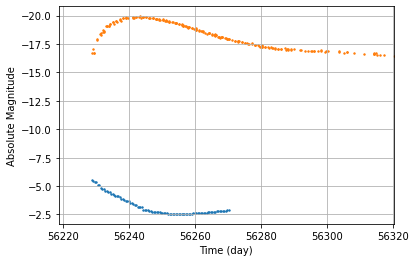

[2.89693284e-06 3.83946113e-06 4.06435919e-06 4.09367463e-06
 7.73632704e-06 7.78912910e-06 1.49618193e-05 1.79787270e-05
 1.87796095e-05 2.58309430e-05 2.77588651e-05 3.03469858e-05
 3.16259891e-05 4.72620720e-05 4.97223544e-05 5.60141321e-05
 7.22174075e-05 7.45347224e-05 8.27220266e-05 8.57622224e-05
 1.32101782e-04 1.40940367e-04 1.65476335e-04 2.17402148e-04
 2.21404827e-04 2.23137938e-04 3.31956076e-04 3.34848493e-04
 4.00904233e-04 4.84792342e-04 4.92411275e-04 6.67655968e-04
 6.78345632e-04 6.81573084e-04 7.56100766e-04 1.17090045e-03
 1.17746891e-03 1.18519743e-03 1.30767422e-03 1.45789621e-03
 1.47402301e-03 1.76135135e-03 1.79189673e-03 1.94726731e-03
 2.06559490e-03 2.07419432e-03 2.07791250e-03 2.32493733e-03
 2.34579173e-03 2.55275240e-03 2.56559912e-03 2.58844234e-03
 2.71618732e-03 2.72162485e-03 2.72477309e-03 2.80022824e-03
 2.80365748e-03 2.80884089e-03 2.81550850e-03 2.82230696e-03
 2.82107376e-03 2.81148283e-03 2.77133331e-03 2.76712978e-03
 2.76552647e-03 2.680616

c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\scipy\optimize\_minimize.py:541: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
<ipython-input-27-0c244eafd888>:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(piece1*piece2*piece3)


IndexError: list index out of range

In [27]:
def expconv(xrange, lamb, sigma, offset, A):    
    piece1 = A/(2*lamb)
    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) - (xrange-offset)/lamb)
    piece3 = sp.special.erfc(sigma/((np.sqrt(2)*lamb)) - (xrange-offset)/(np.sqrt(2)*sigma))
    print(piece1*piece2*piece3)
    return np.log10(piece1*piece2*piece3)

def cost(x, x_axis, datapoint_value):
    return np.sum((expconv(x_axis, x[0], x[1], x[2], x[3]) - datapoint_value)**2)

# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 15 # Num of days after the maximum used for peak fitting from the peak

for i in range(len(filename)): # Loop through all SN
    if len(Time[i]) != 0: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        lamb_guess = 7
        sigma_guess = 5
        offset_guess = Time[i][maximum]
        A_guess = 1
        guesses = [lamb_guess, sigma_guess, offset_guess, A_guess]
        
        
        
        
        debug2 = [np.exp(sigma_guess*sigma_guess/(2*lamb_guess*lamb_guess) - (t[j]-offset_guess)/lamb_guess) for j in range(len(t))]
        print('piece 2 is', debug2)
        debug3 = [sp.special.erfc(sigma_guess/((np.sqrt(2)*lamb_guess)) - (t[j]-offset_guess)/(np.sqrt(2)*sigma_guess)) for j in range(len(t))]
        print('piece 3 is', debug3)
        for j in range(len(debug2)):
            print(np.log10((A_guess/(2*lamb_guess))*debug2[j]*debug3[j]))
        
        
        
        
        res = minimize(cost, guesses, args = (t, m), method = 'COBYLA', bounds = ((0, 20), (0, 20), (offset_guess-10, offset_guess+10), (-100, 100)))
        print(res)
        print(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))
        
        # Save the time of maximum magnitude
        Time_max.append(res.x[2])
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, expconv(t, res.x[0], res.x[1], res.x[2], res.x[3])), ', Time of maximum brightness:', Time_max[i])
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], len(t))
        Y = expconv(t, res.x[0], res.x[1], res.x[2], res.x[3])
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
    
        if r2_score(m, expconv(t, res.x[0], res.x[1], res.x[2], res.x[3])) > 0.8:
            Succ_graph.append(1)
        else:
            Succ_graph.append(0)
        
    else:
        Time_max.append(0)
        Succ_graph.append(0)


print(Succ_graph)

In [20]:
Time_shifted = [] # Save the shifted time list for better result demonstration (All light curve peaking at day 0)
k = 0

for i in range(len(Succ_graph)):
    Time_shifted.append([]) # Create 2D list
    if Succ_graph[i] == 1:
        diff = Time_max[i] - Time_max[0] 
        for j in range(len(Time[i])): # Calculate the shifted time list
            Time_shifted[i].append(Time[i][j] - diff - Time_max[0])
            
        k+=1

print(k)

56


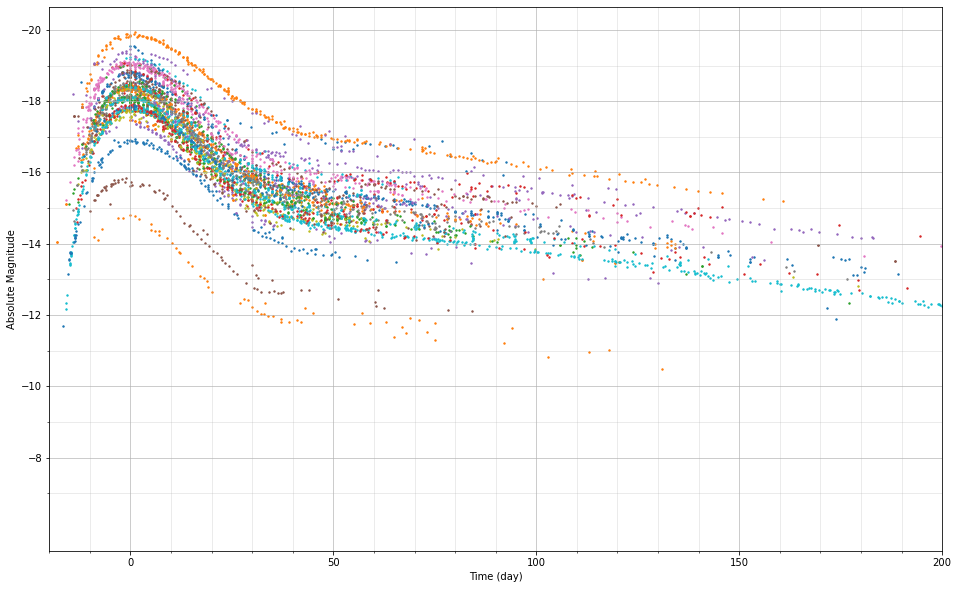

In [21]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)

plt.gca().invert_yaxis()

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(-50, 600, 50)
minor_ticks_x = np.arange(-50, 600, 10)

major_ticks_y = np.arange(-22, -6, 2)
minor_ticks_y = np.arange(-22, -6, 1)


ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)

ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.grid(which='major', alpha=0.8)
ax.grid(which='minor', alpha=0.3)

plt.xlabel('Time (day)')
plt.ylabel('Absolute Magnitude')

plt.xlim(-20, 200)
#plt.ylim(-12, -21)

for i in range(len(Succ_graph)):
    if Succ_graph[i] == 1:
        plt.scatter(Time_shifted[i], Magnitude_Abs[i], s=2)

 
0.387 x - 18.81
0.015333298682346896


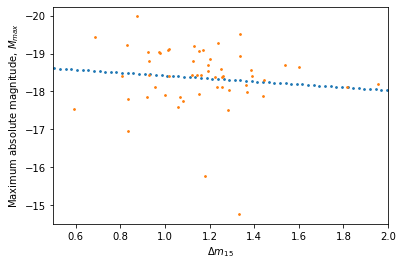

In [25]:
# Philips relation

M = []
dm_P = []

for i in range(len(filename)): # Loop through all SN
    if Succ_graph[i] == 1: # Avoid poor fitting curve
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
            # Save the peaking part of the light curve
            t = Time[i][:maximum + j]
            m = Magnitude_Abs[i][:maximum + j]
        
            # Polynomial (degree = 3) fit of the peak part of the light curve 
            P = np.poly1d(np.polyfit(t, m, deg = 3))
        
            a = t[-1] - t[maximum]
            b = P(t[-1]) - P(t[maximum])
        
            M.append(P(t[maximum]))
            dm_P.append(15 * b / a)


P1 = np.poly1d(np.polyfit(dm_P, M, deg = 1))
print(P1)
print(r2_score(M, P1(dm_P)))
#print(len(m_P), len(M))


# Plot out the linear relationship
plt.gca().invert_yaxis()
plt.xlabel('$\Delta m_{15}$')
plt.ylabel('Maximum absolute magnitude, $M_{max}$')
x = np.linspace(0, 2.5, 100)
plt.xlim(0.5, 2)
plt.scatter(x, P1(x), s=3)
plt.scatter(dm_P, M, s=3)